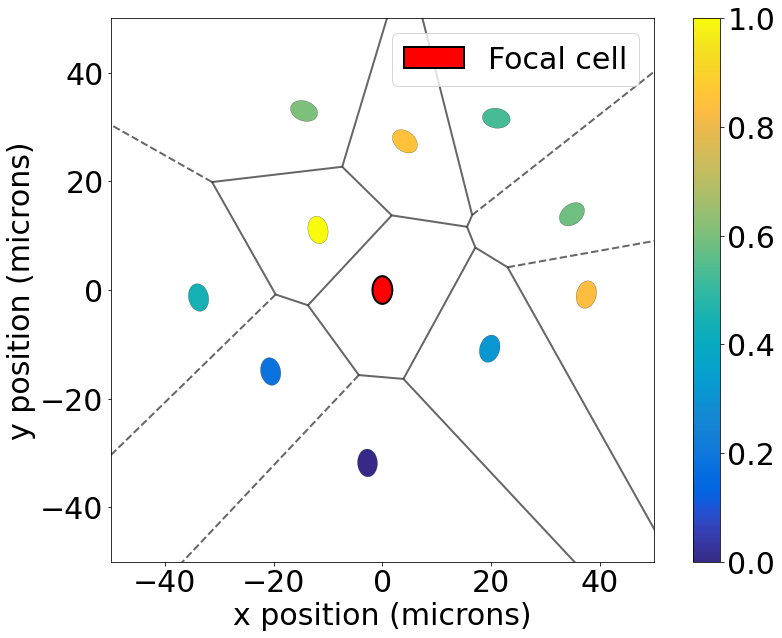

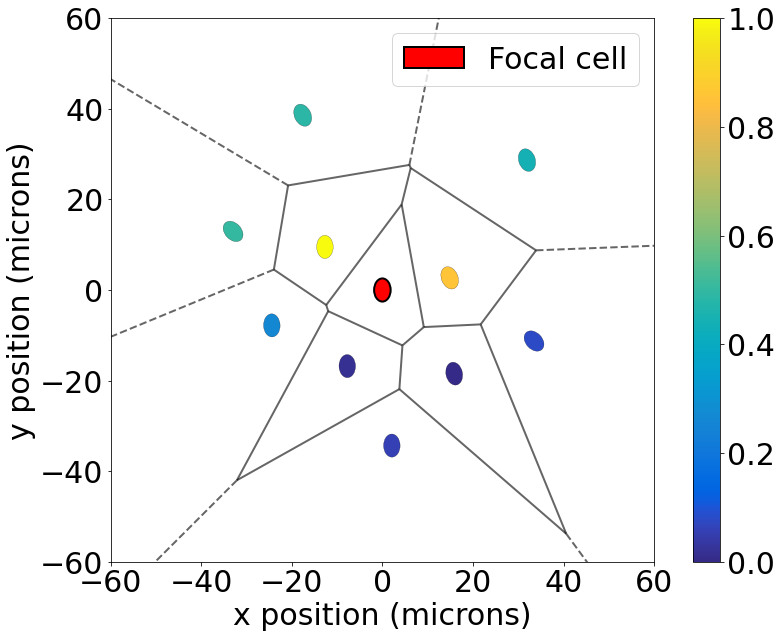

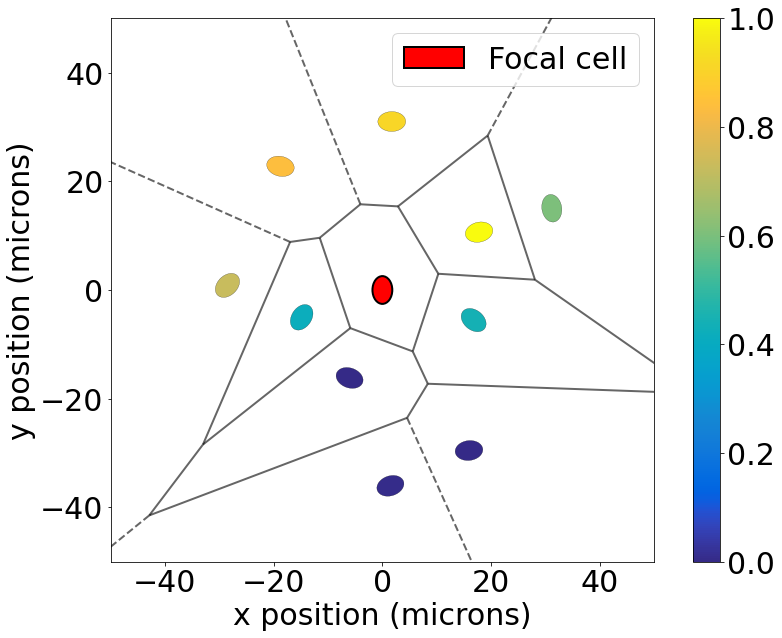

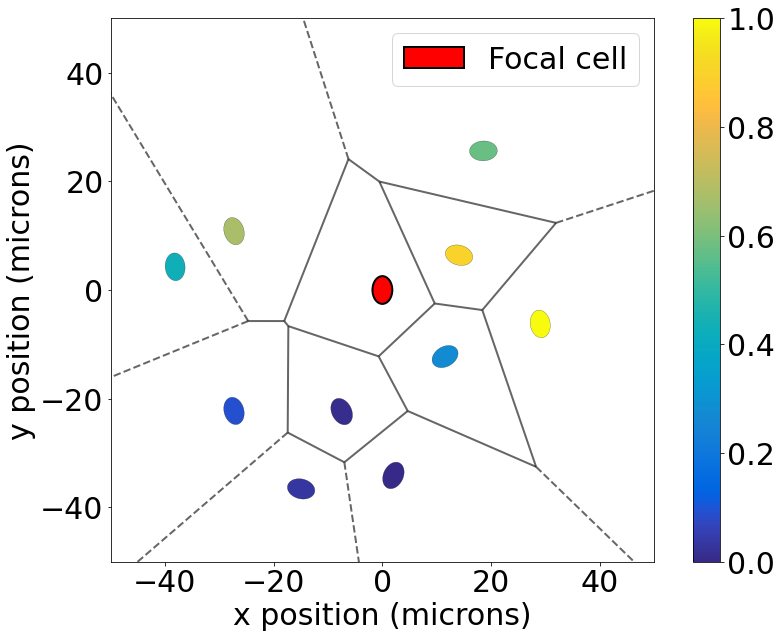

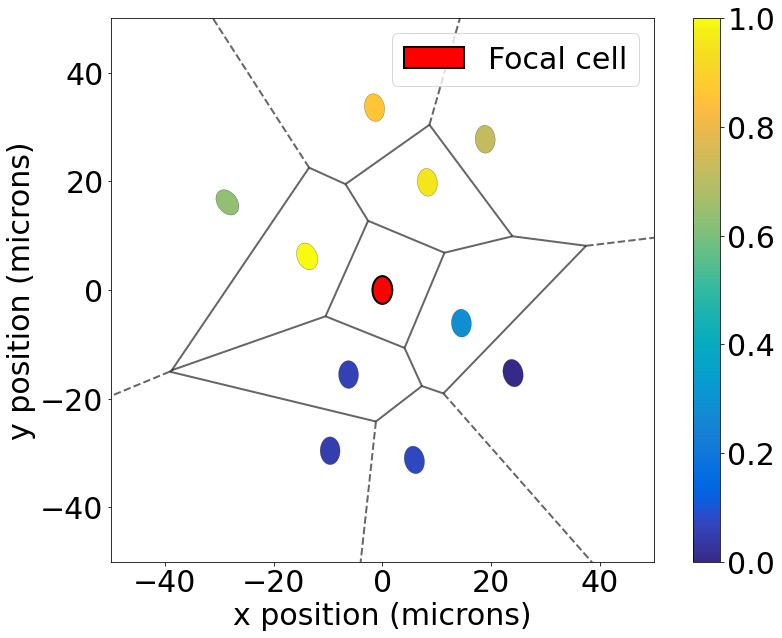

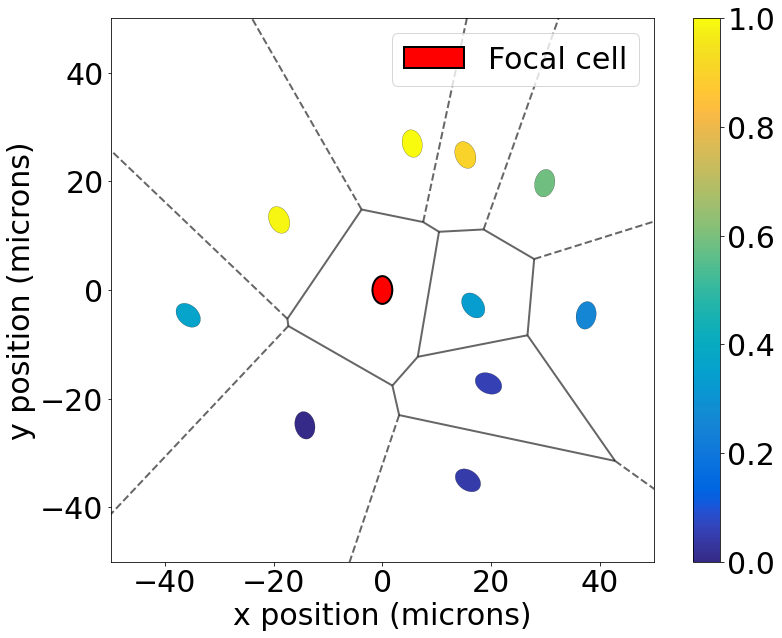

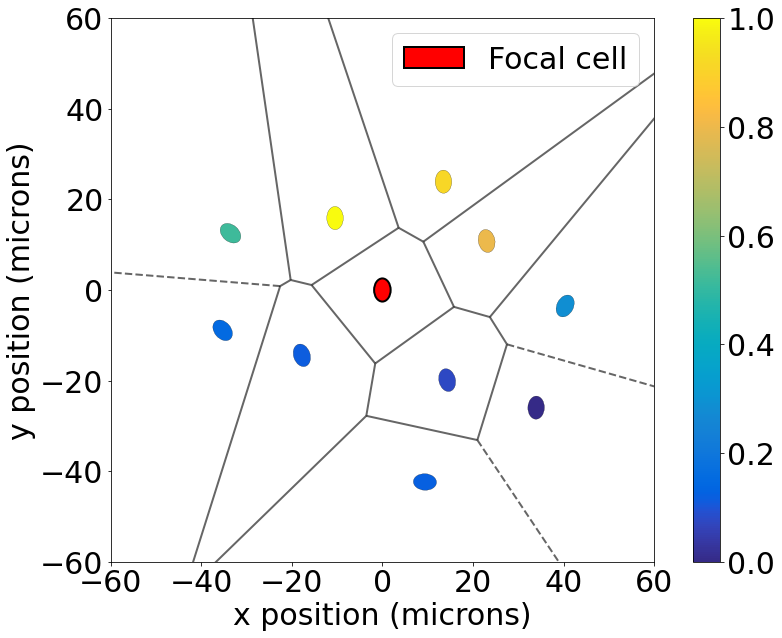

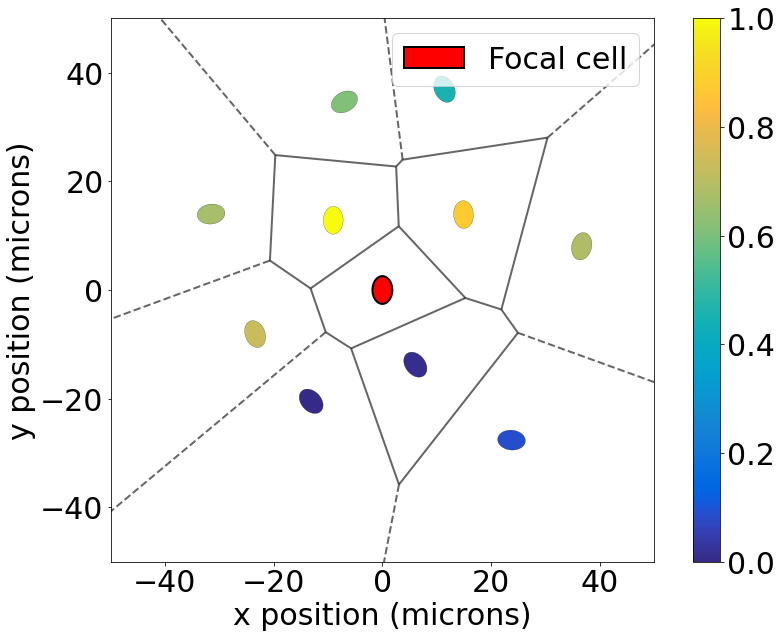

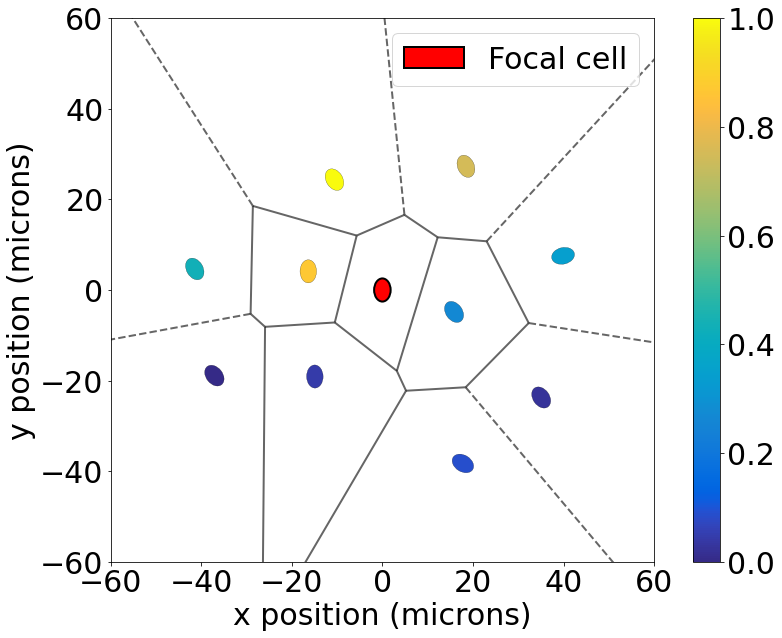

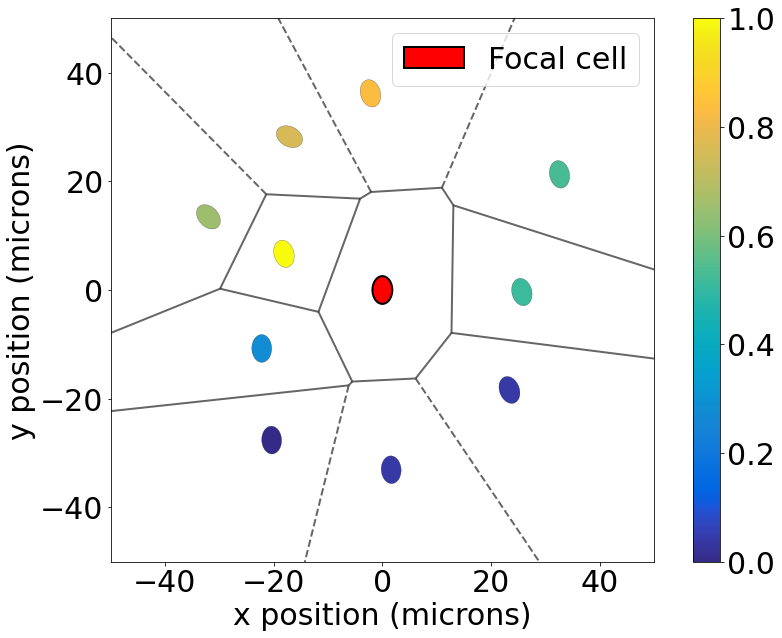

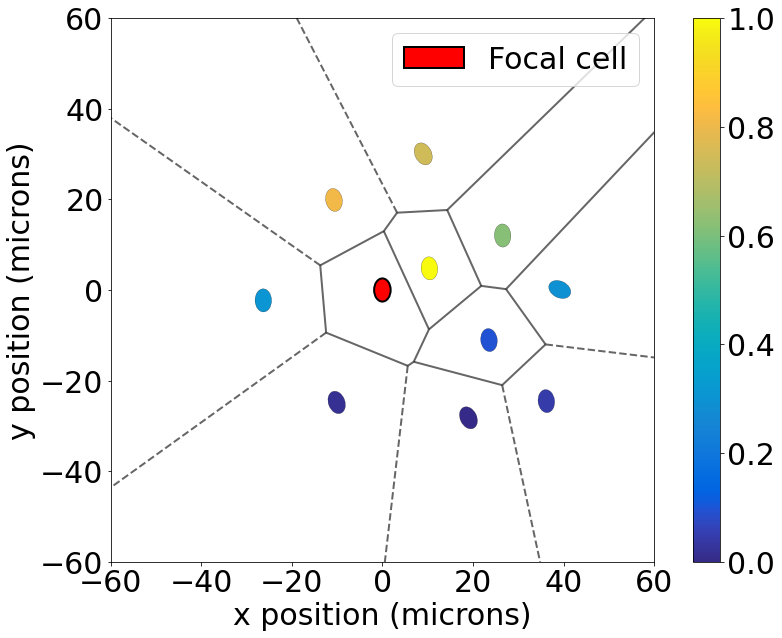

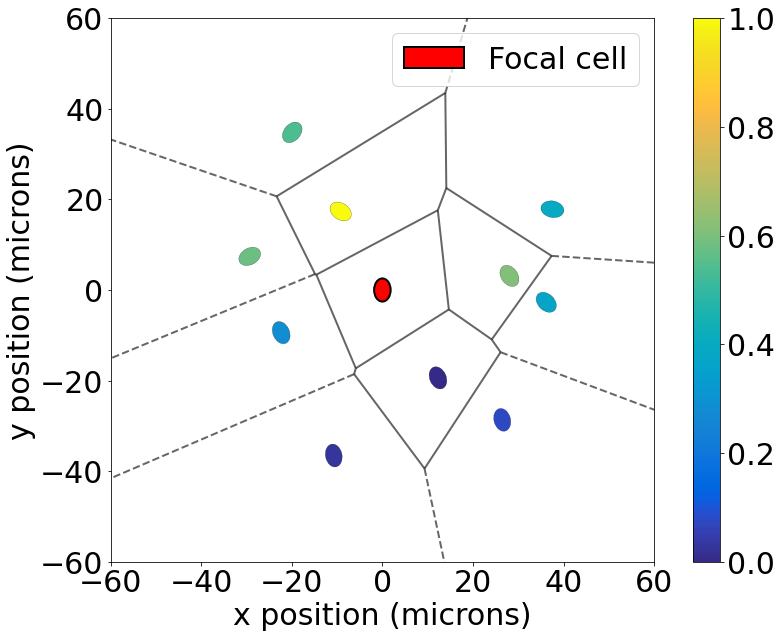

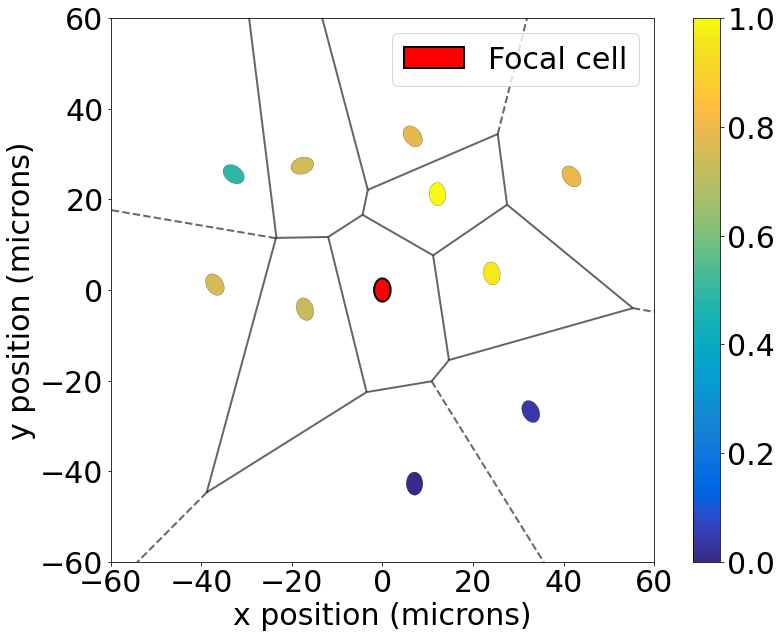

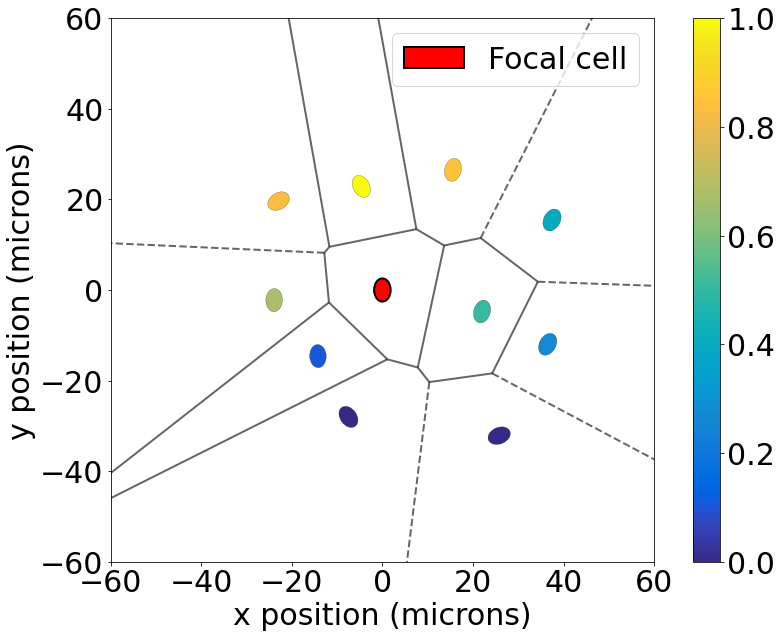

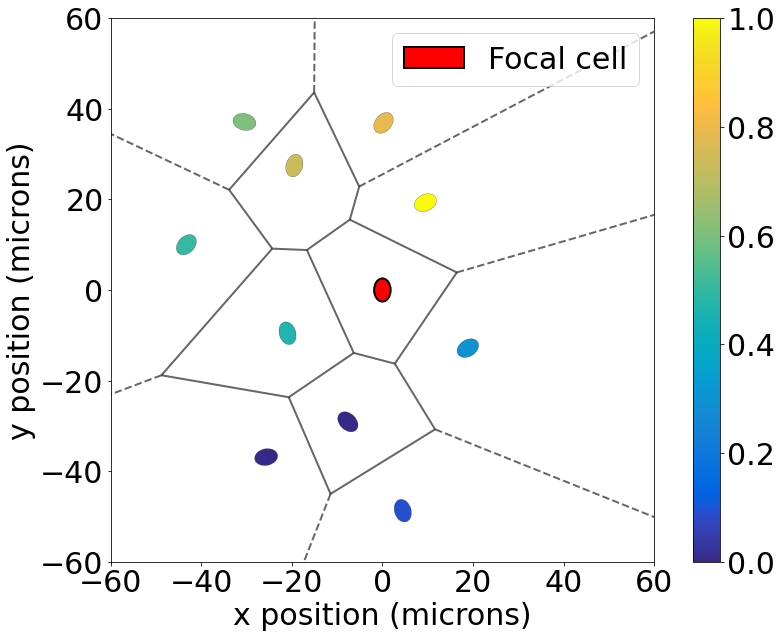

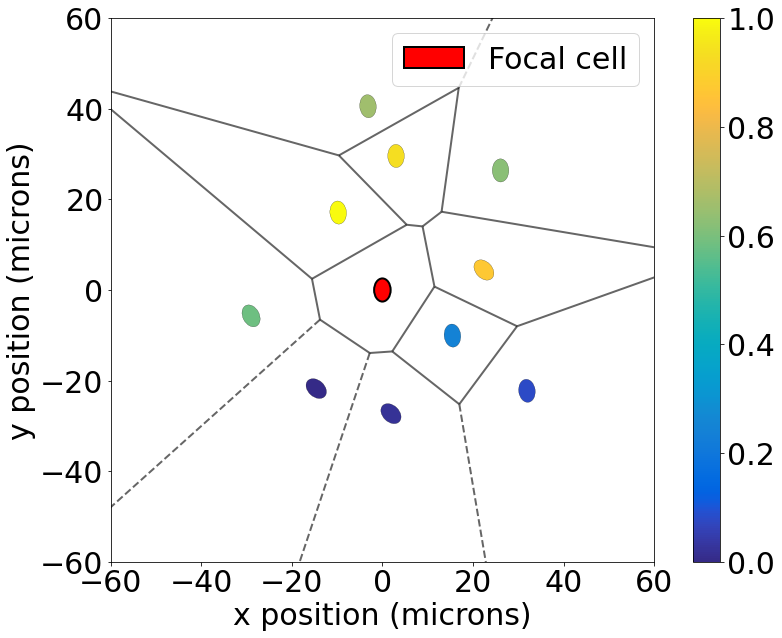

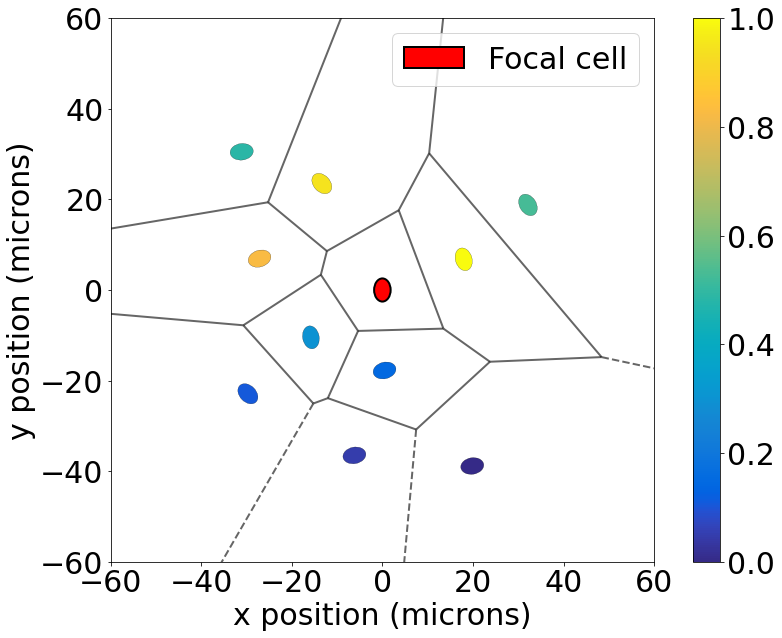

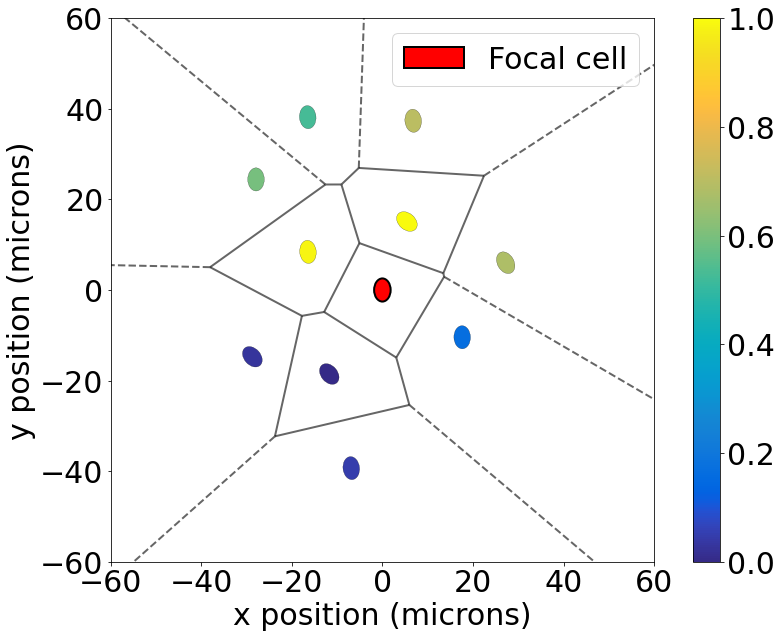

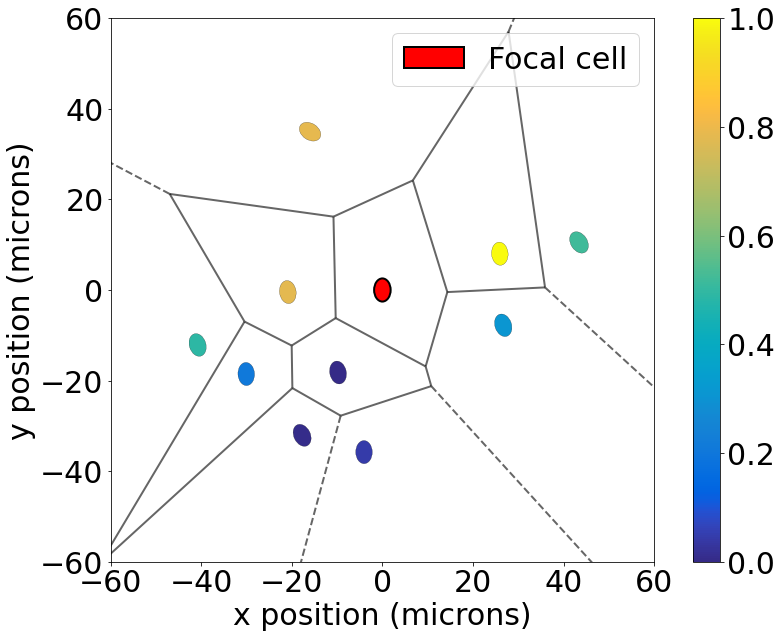

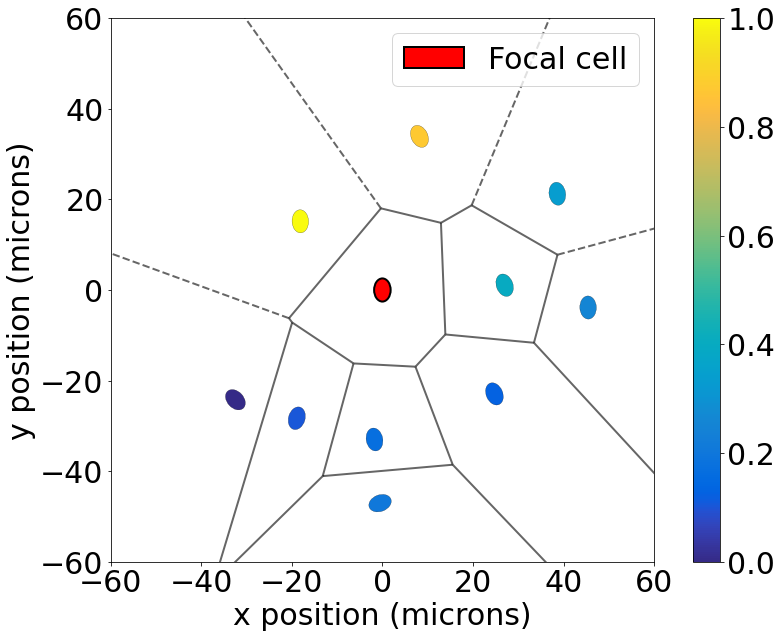

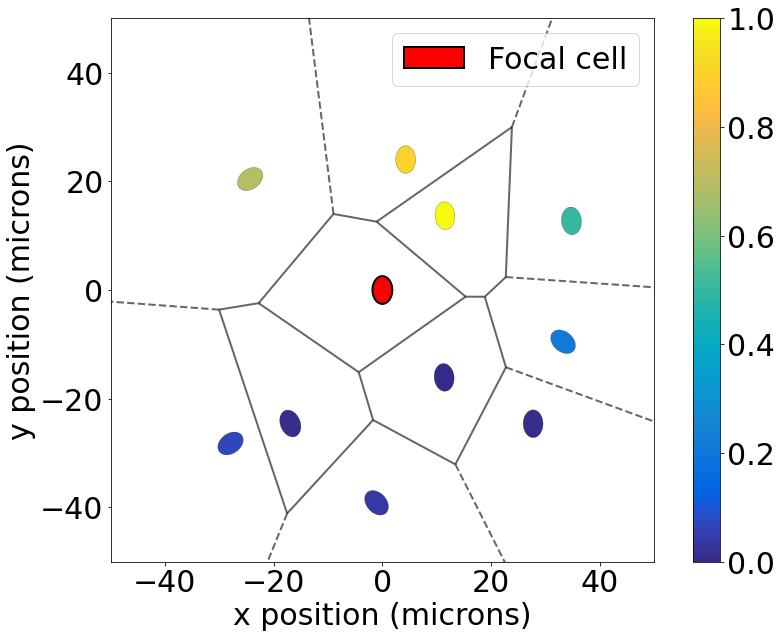

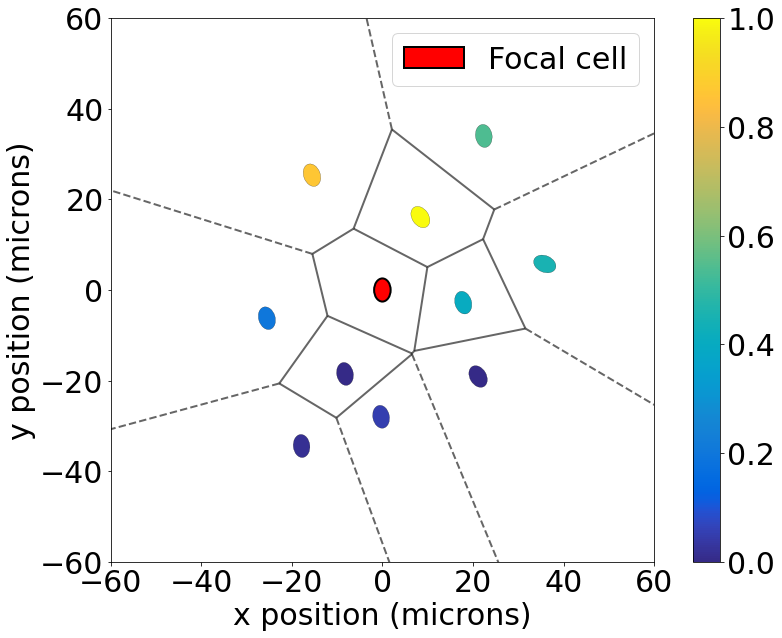

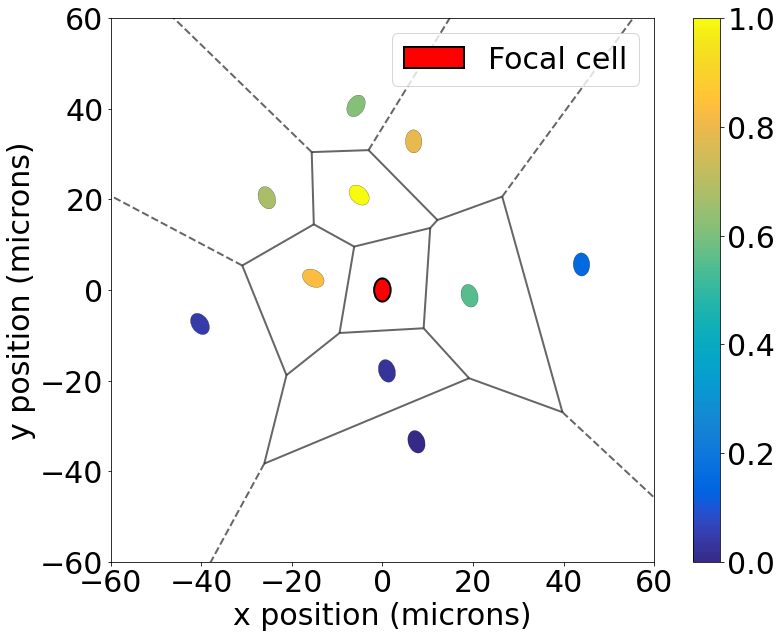

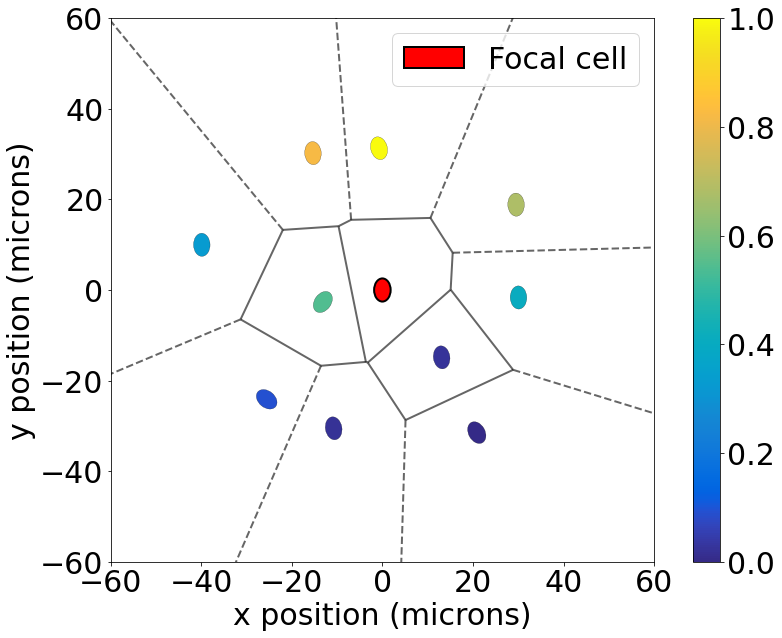

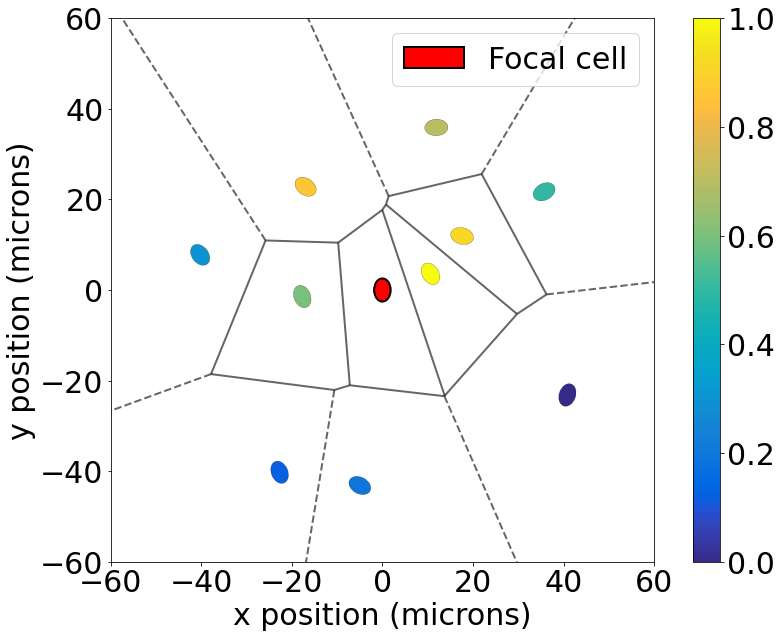

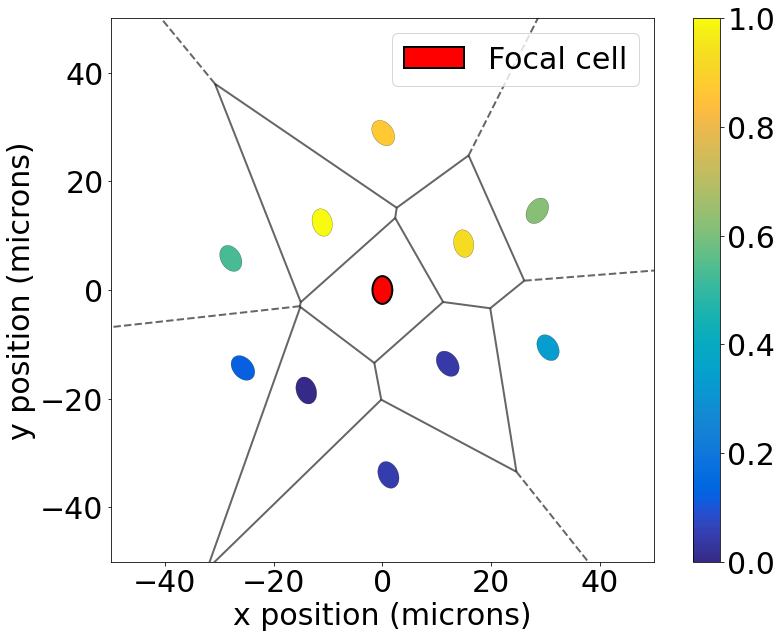

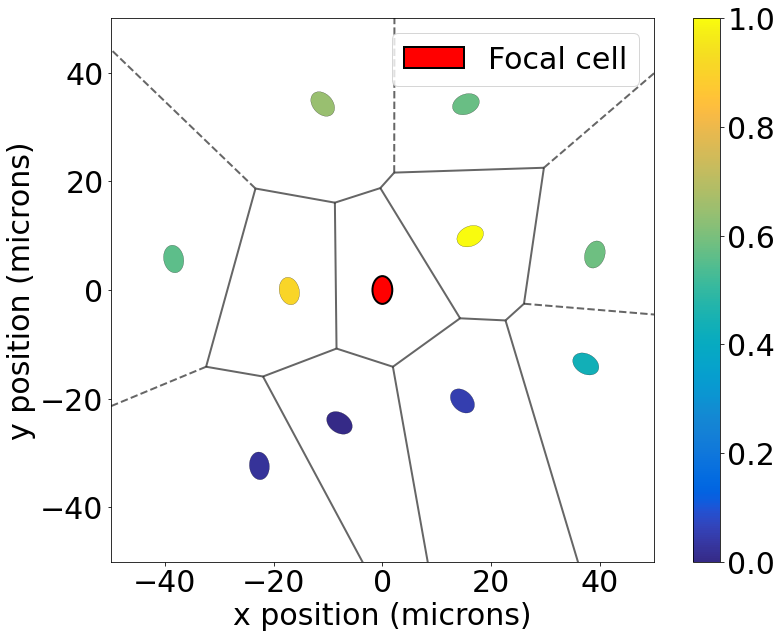

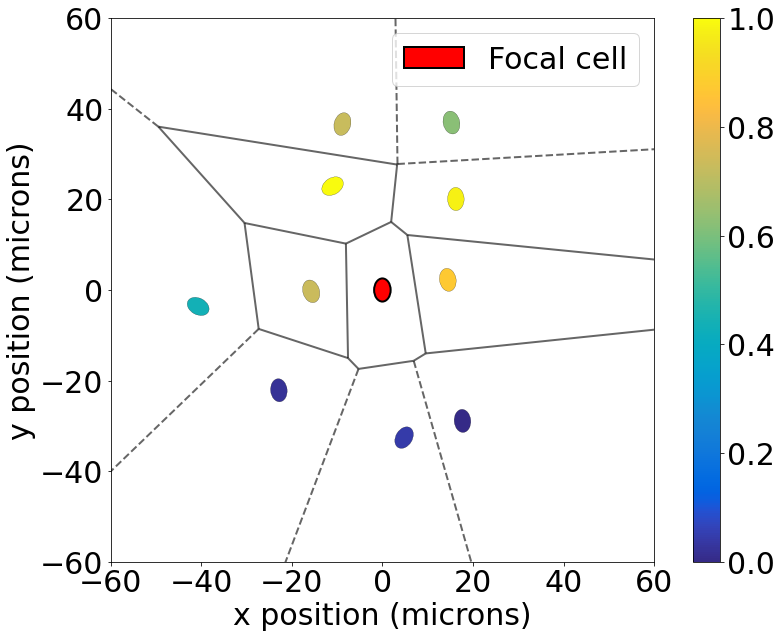

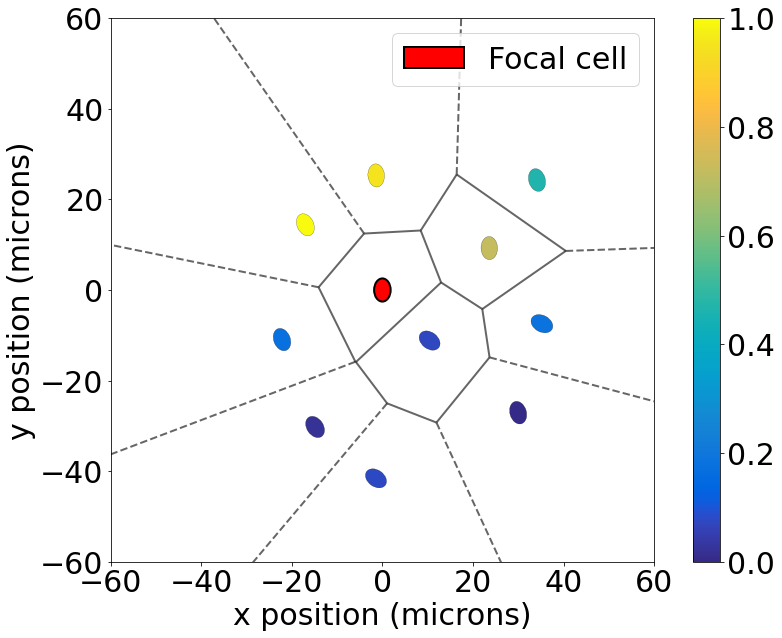

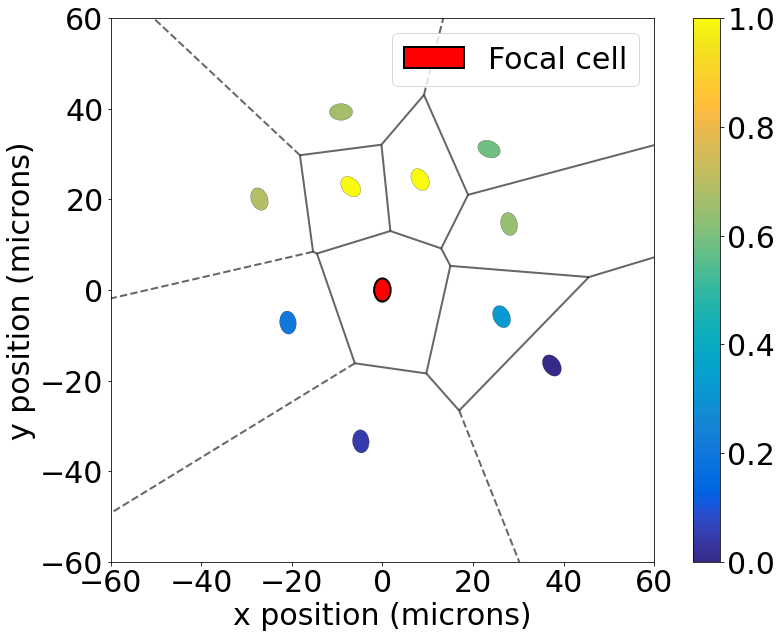

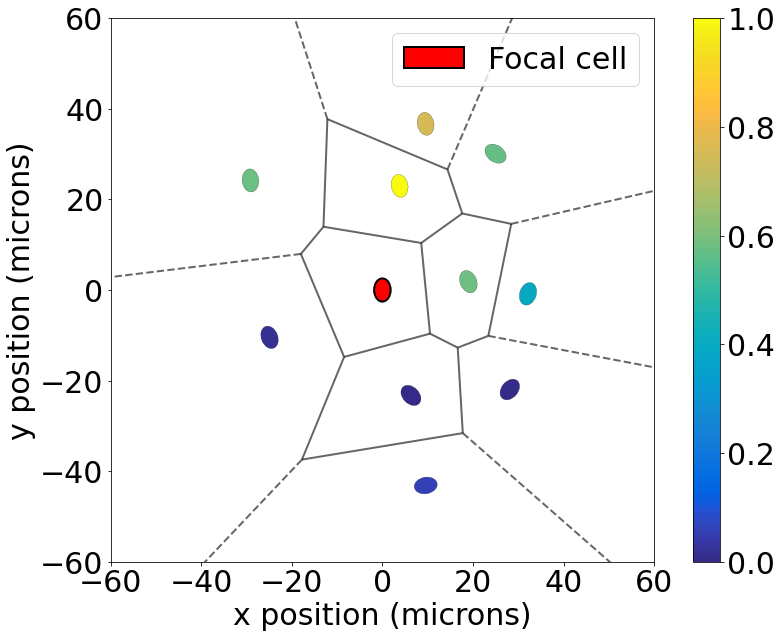

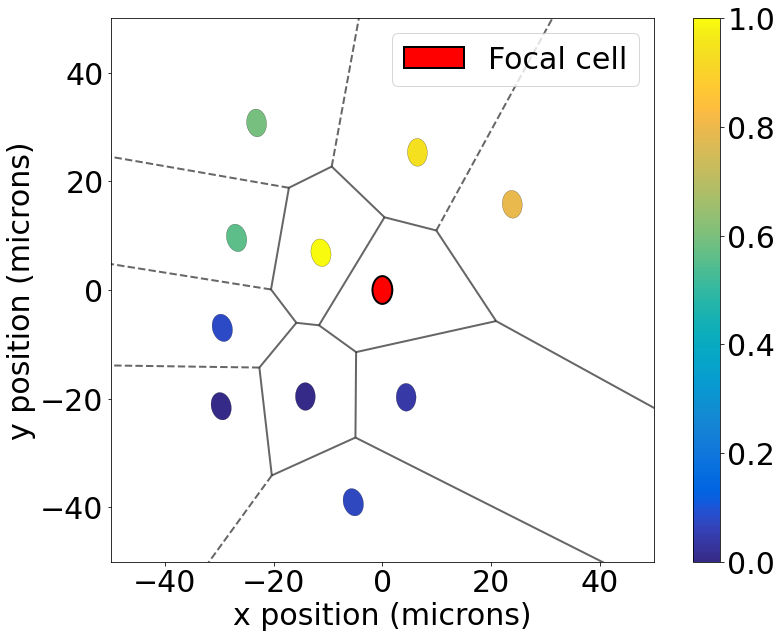

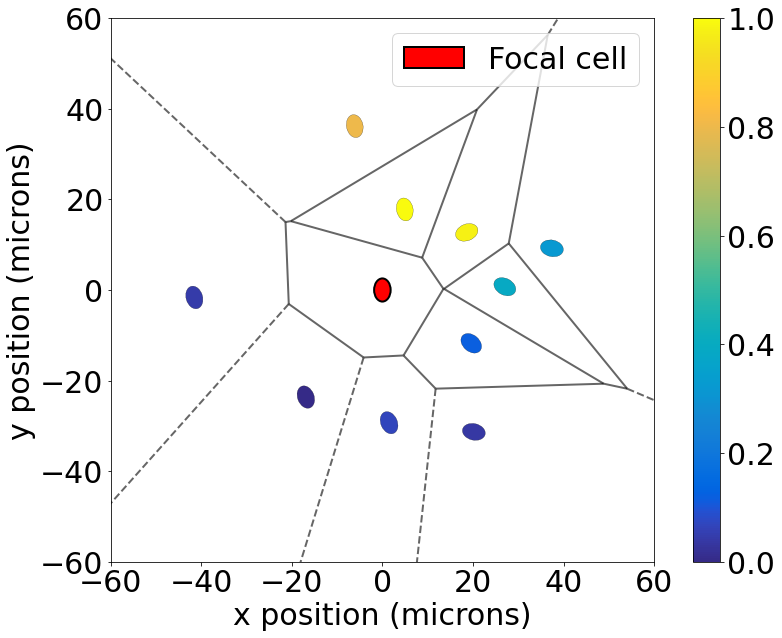

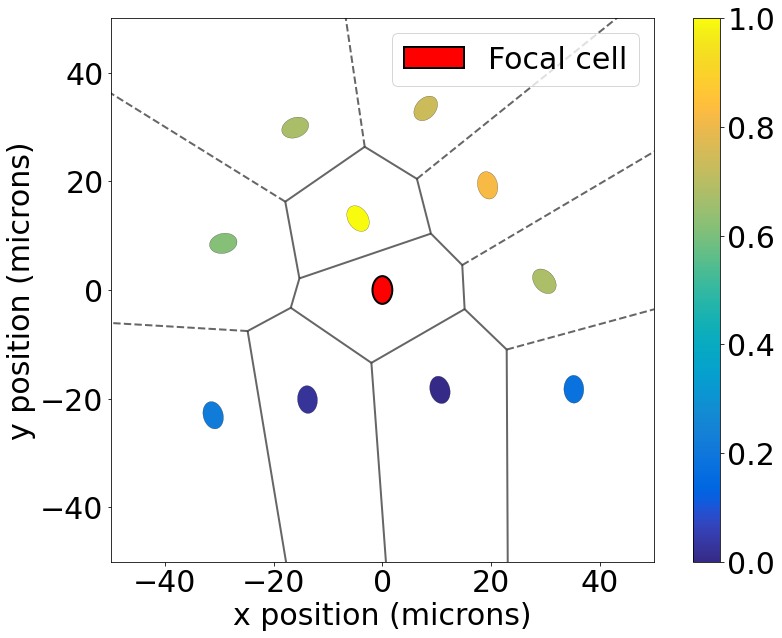

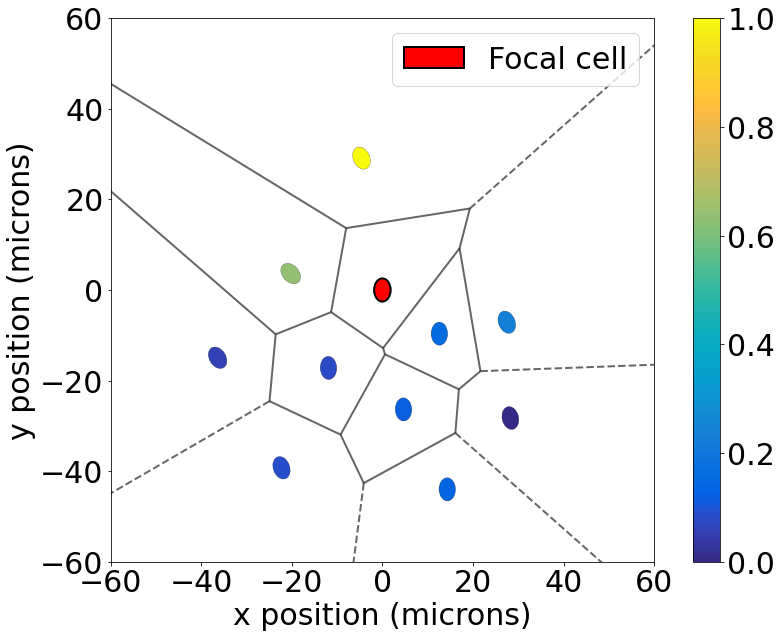

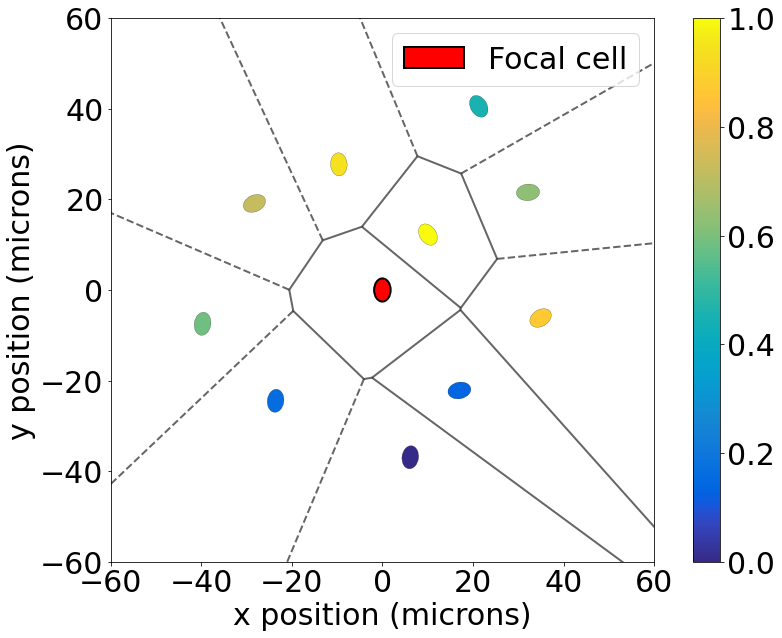

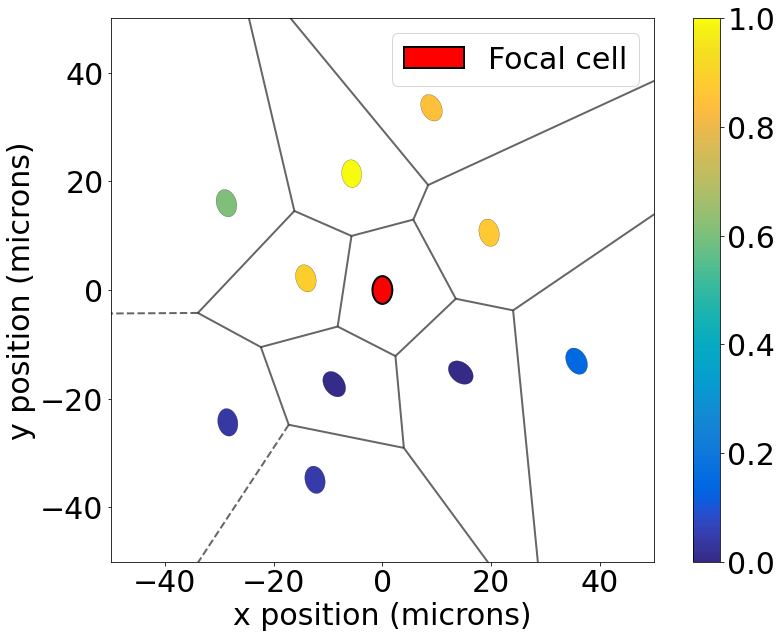

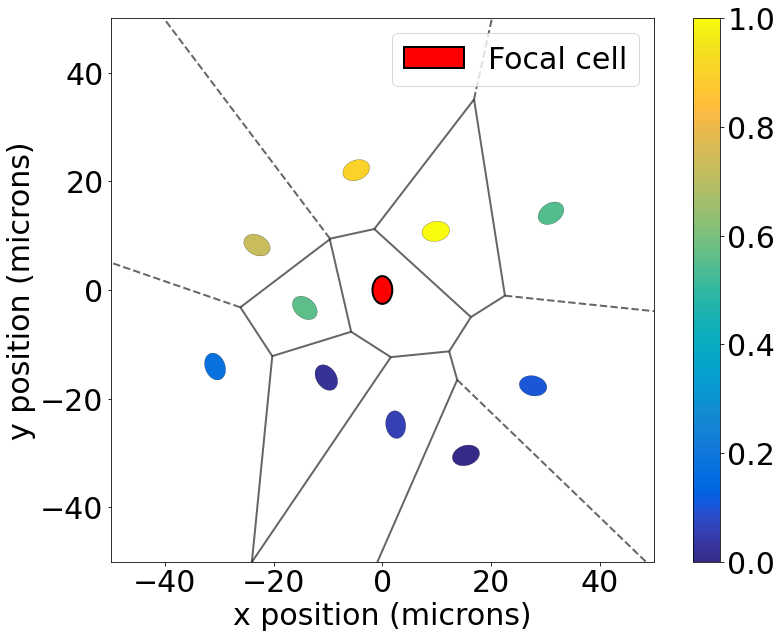

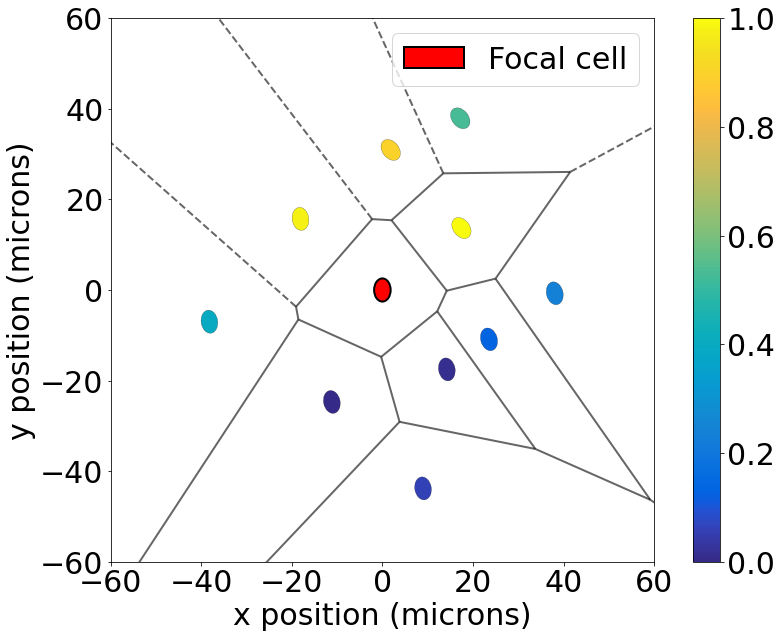

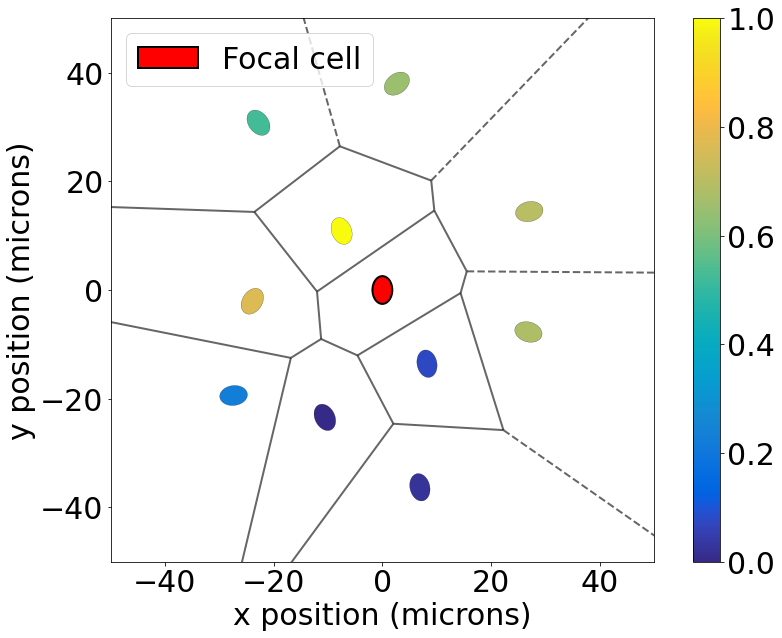

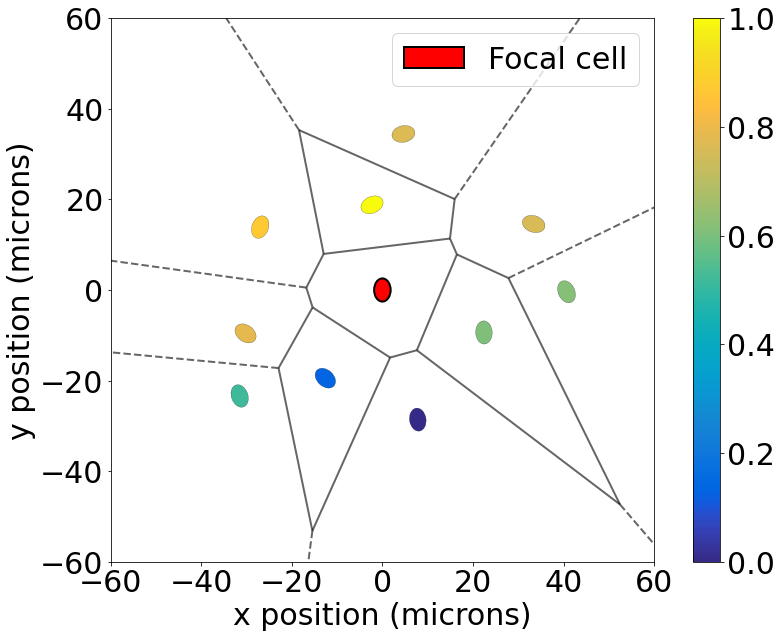

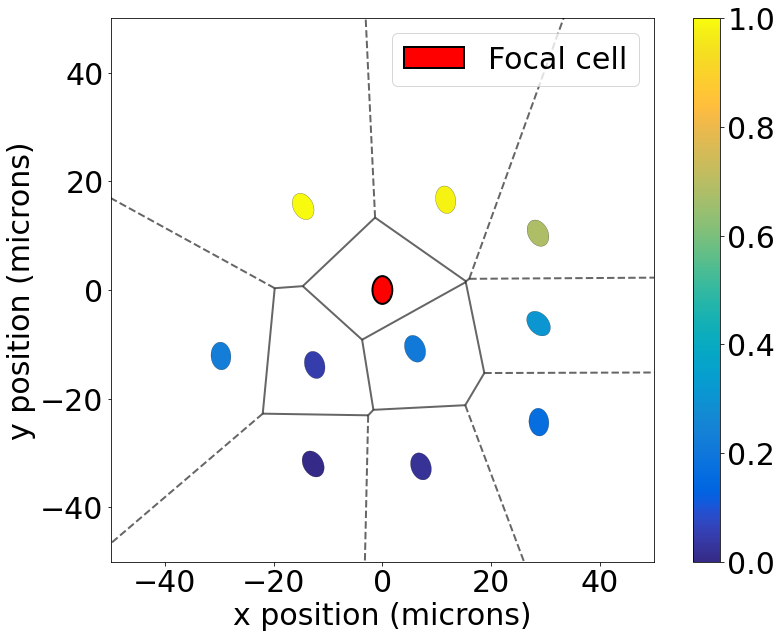

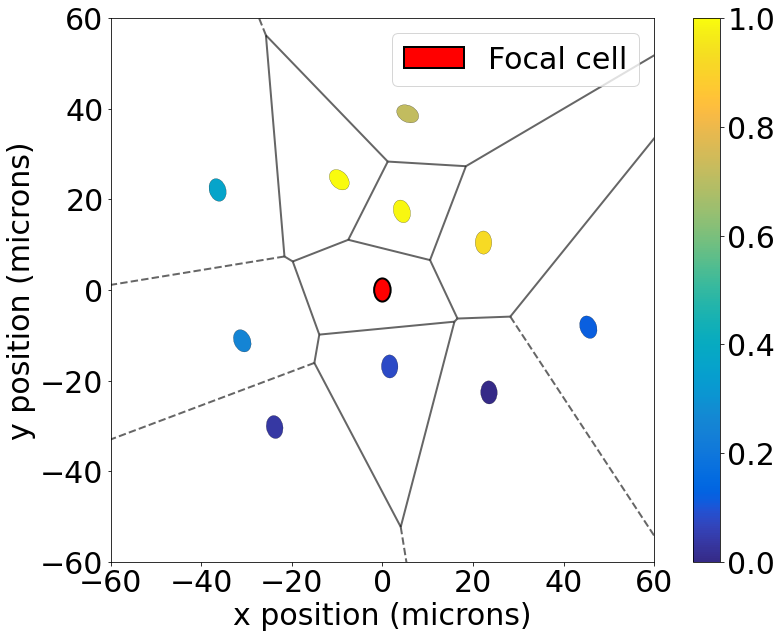

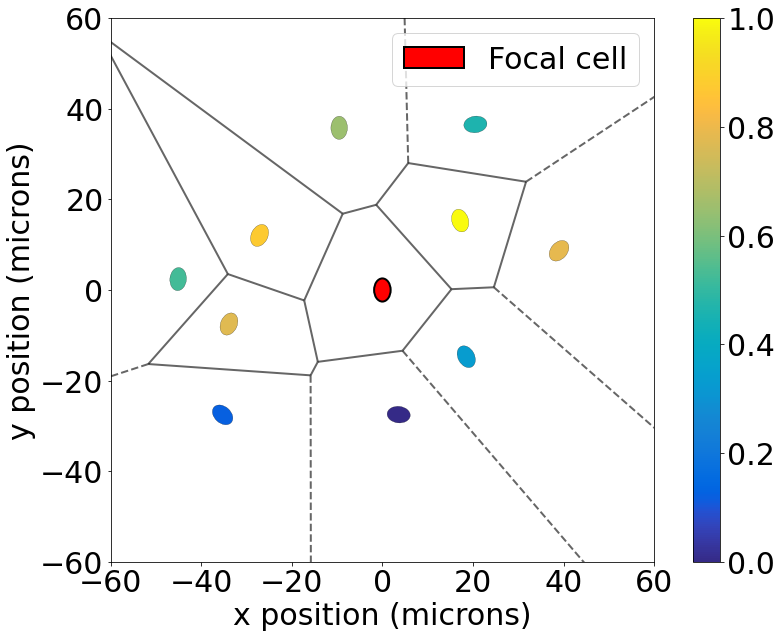

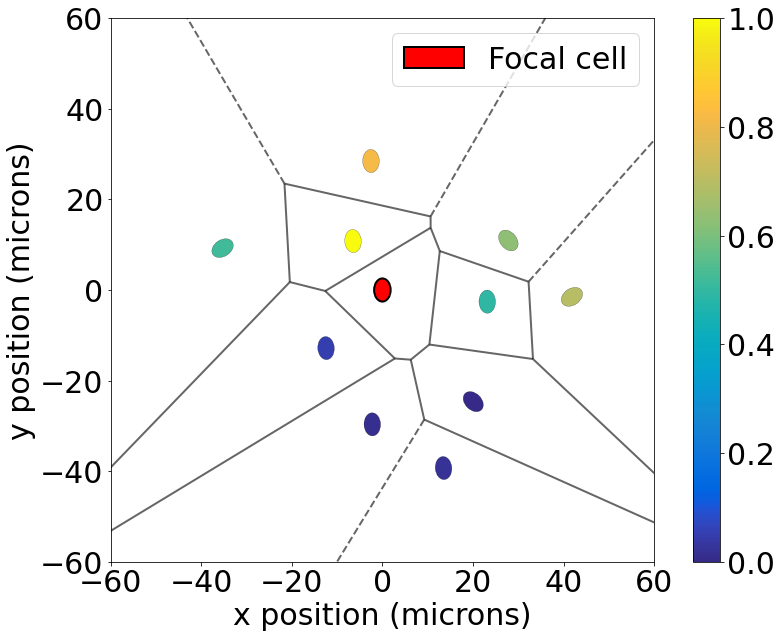

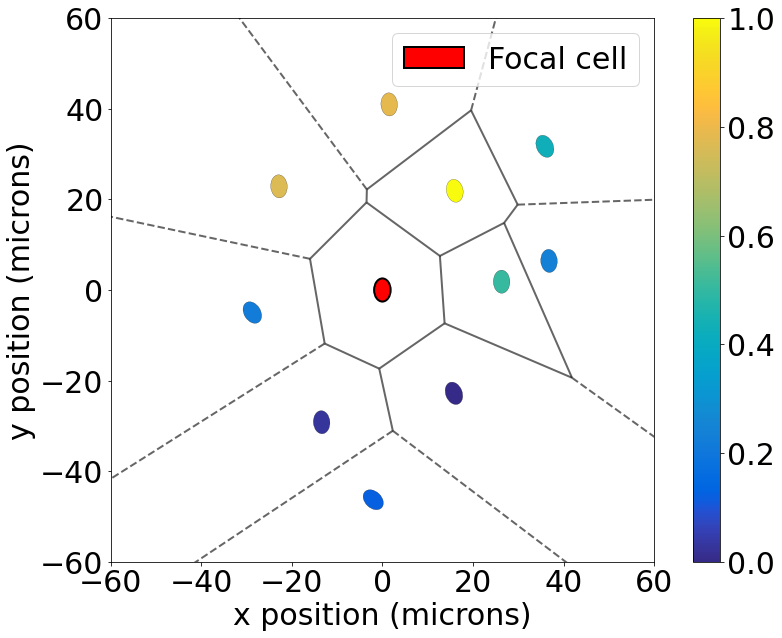

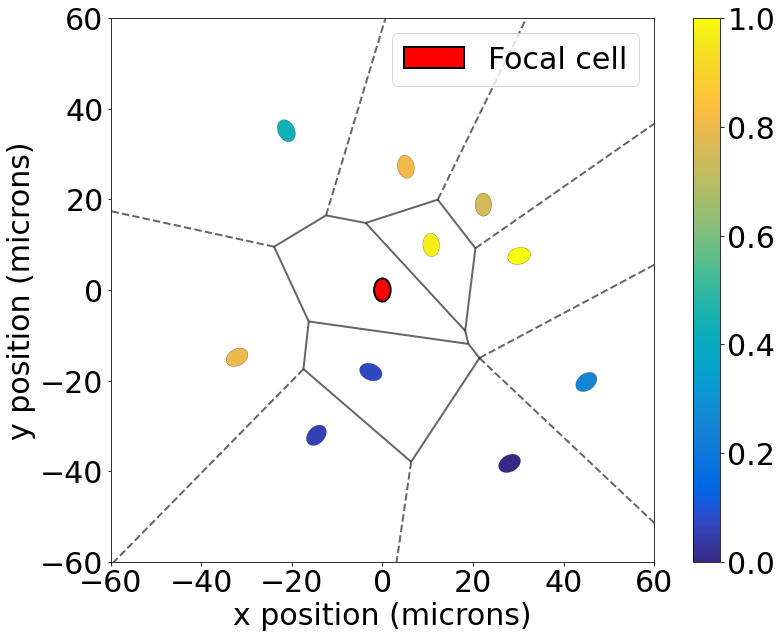

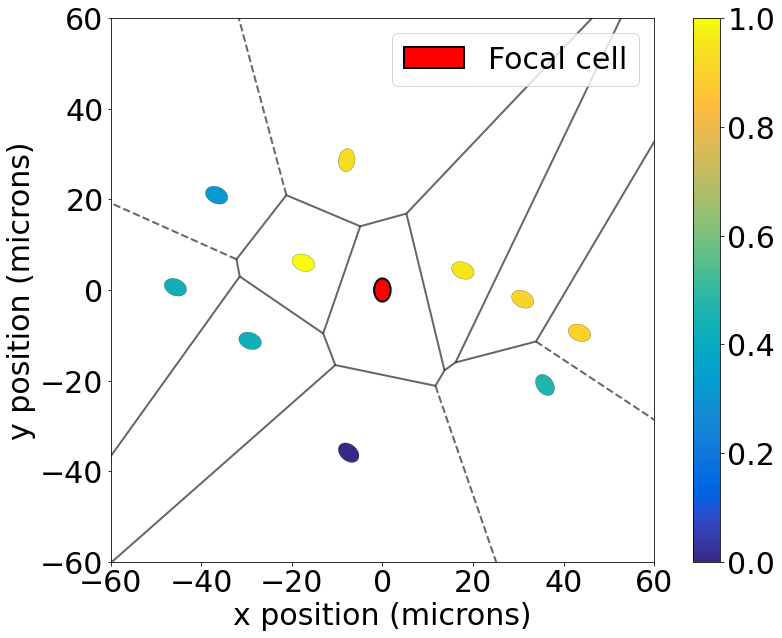

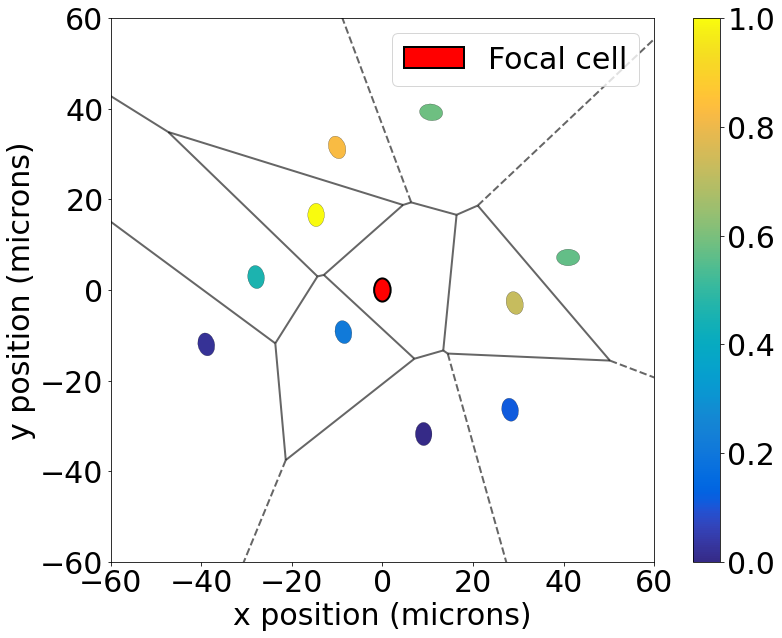

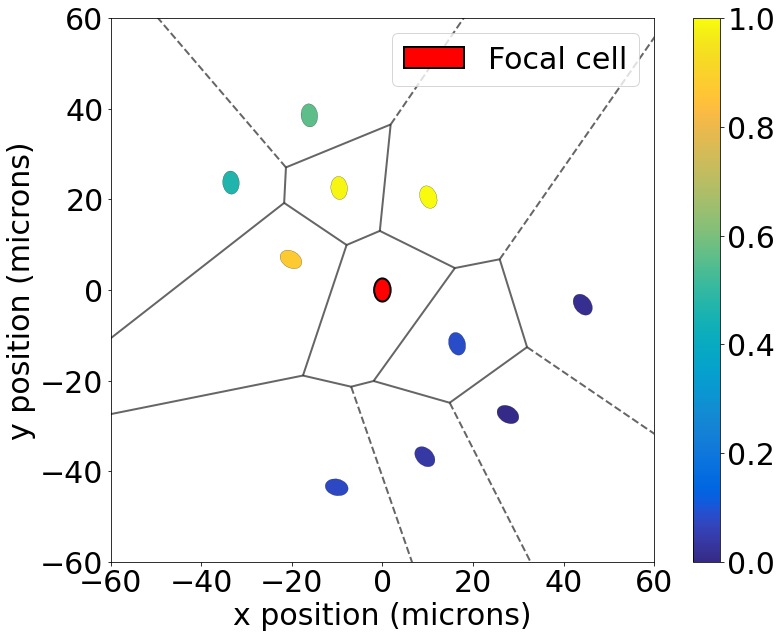

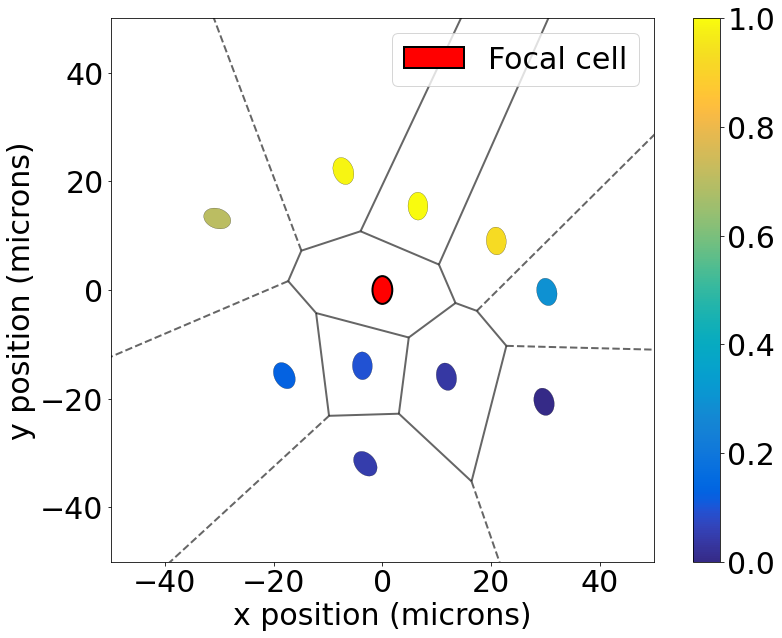

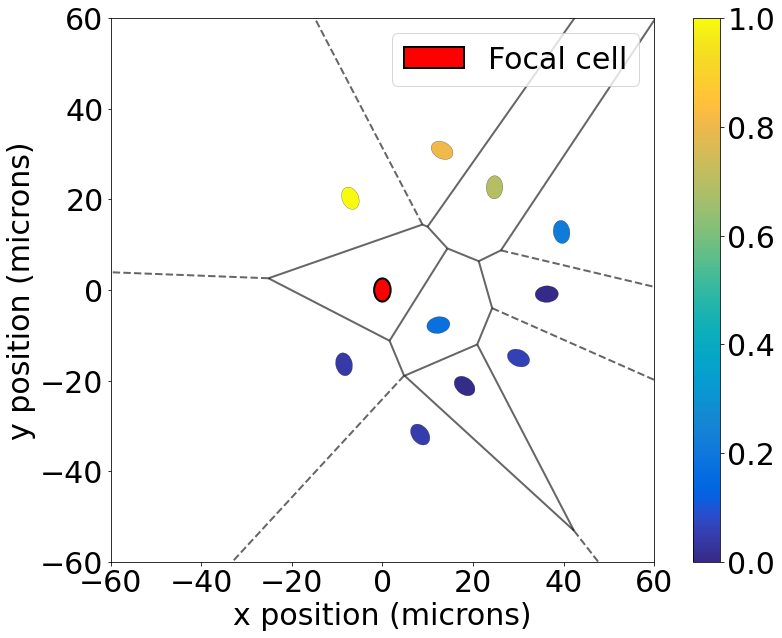

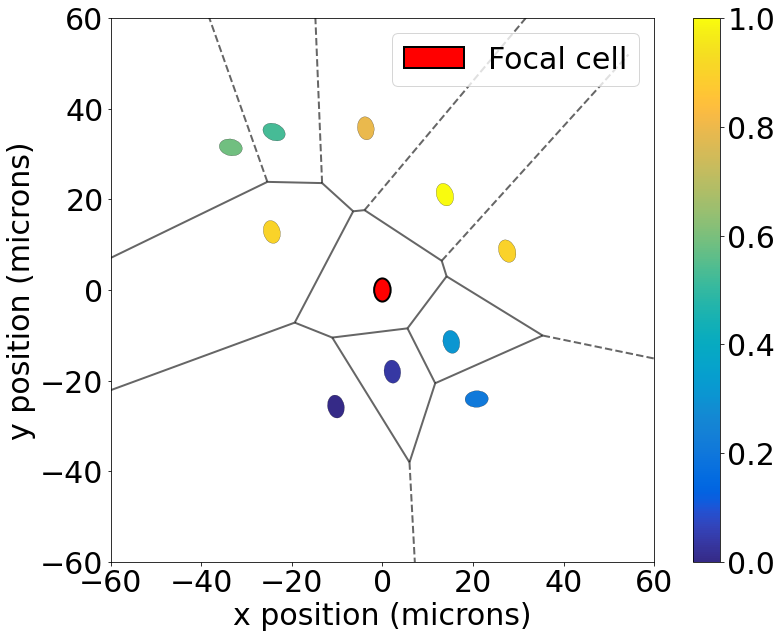

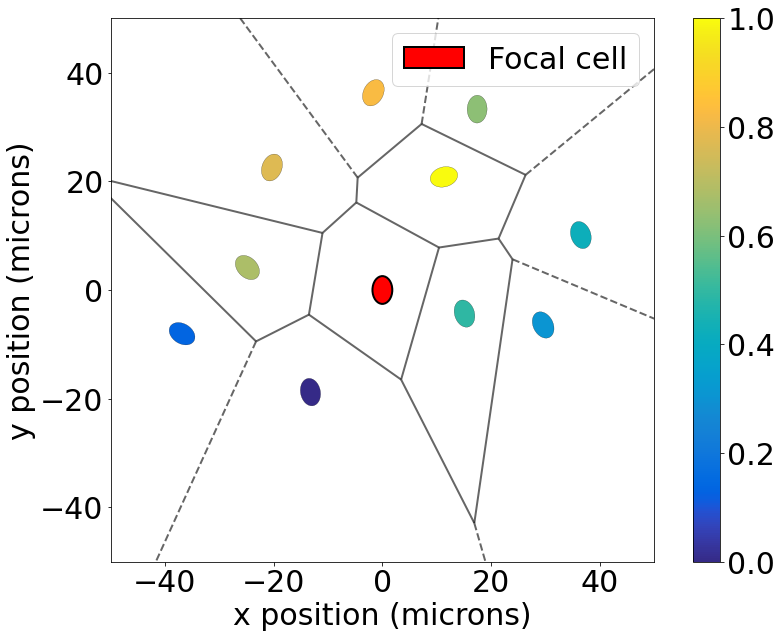

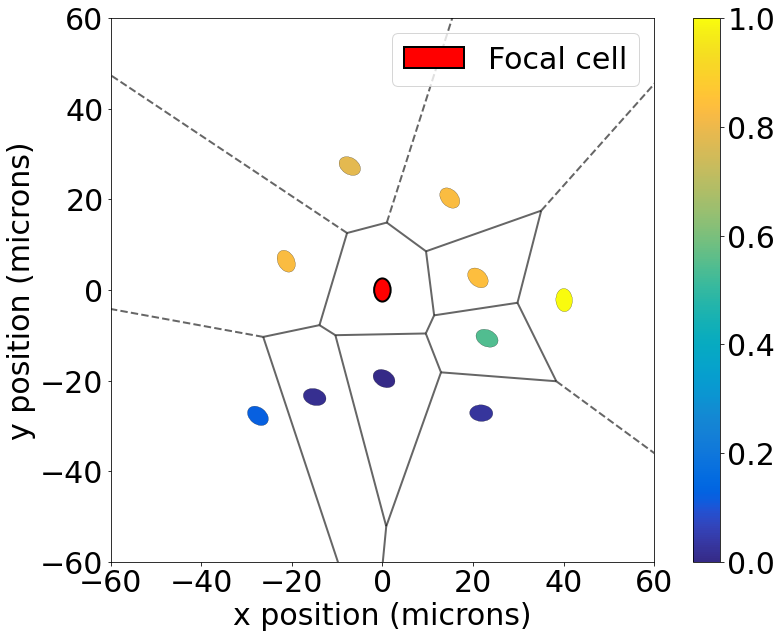

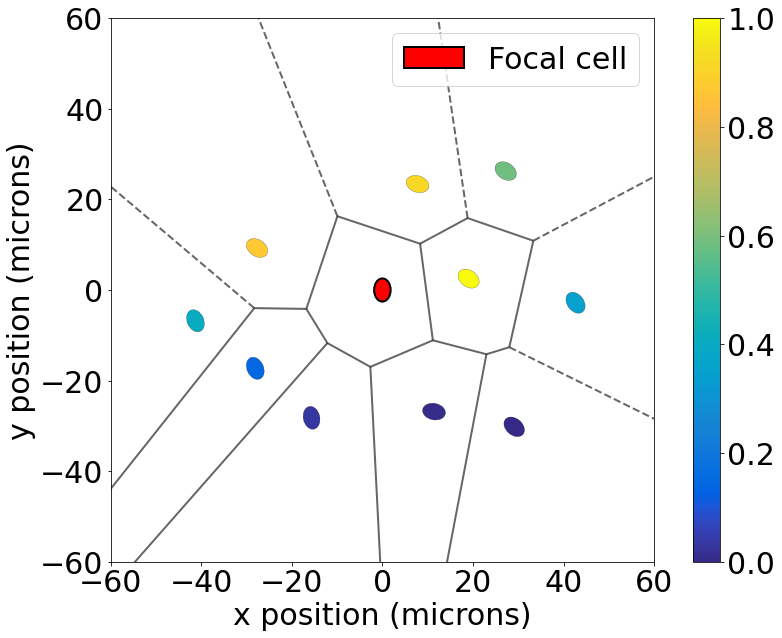

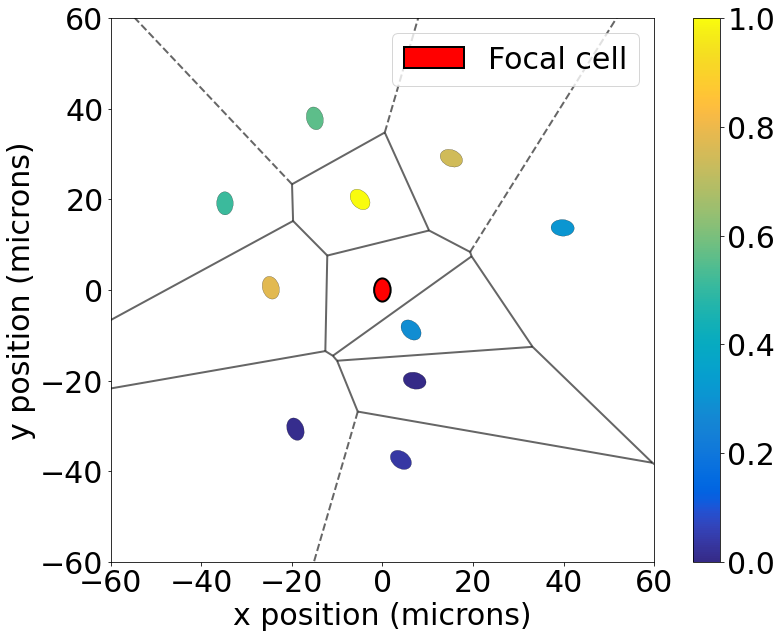

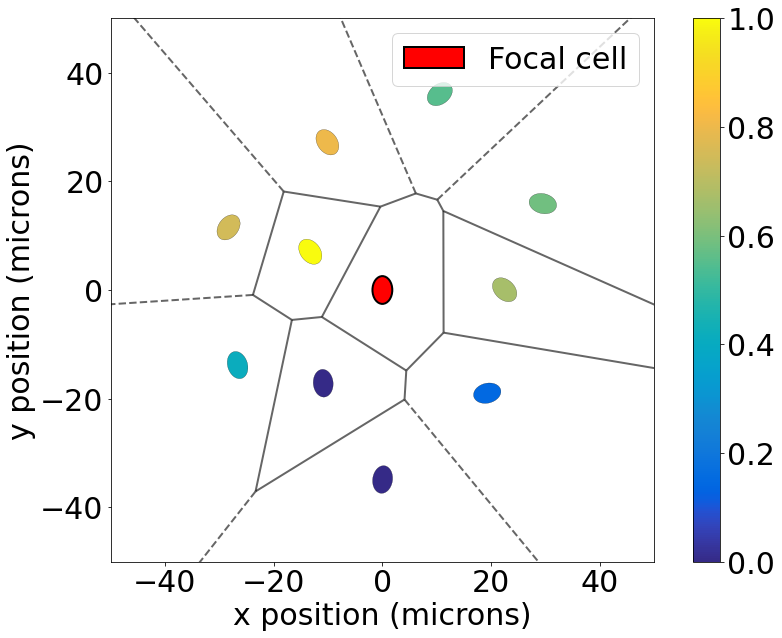

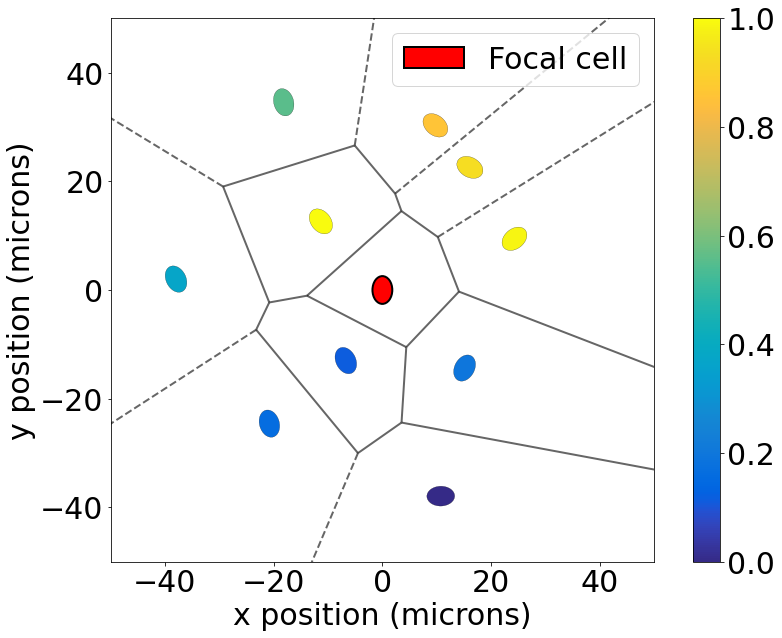

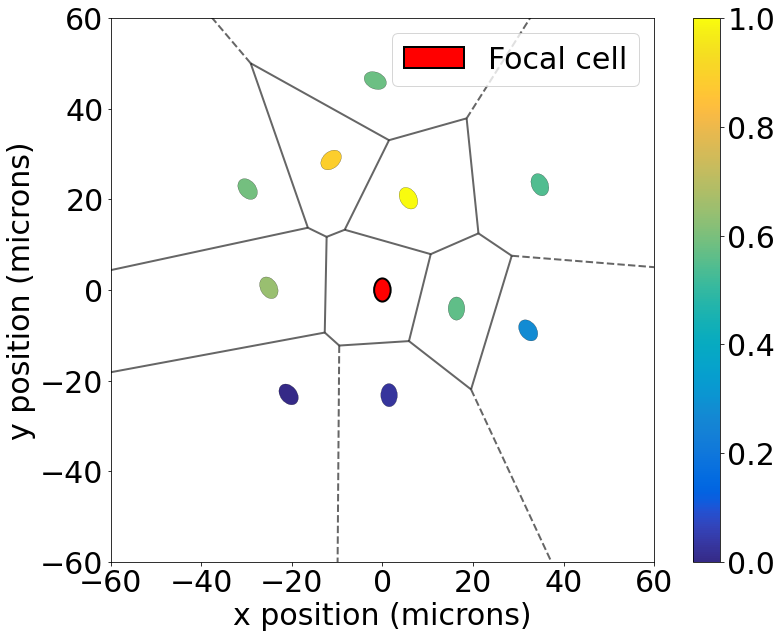

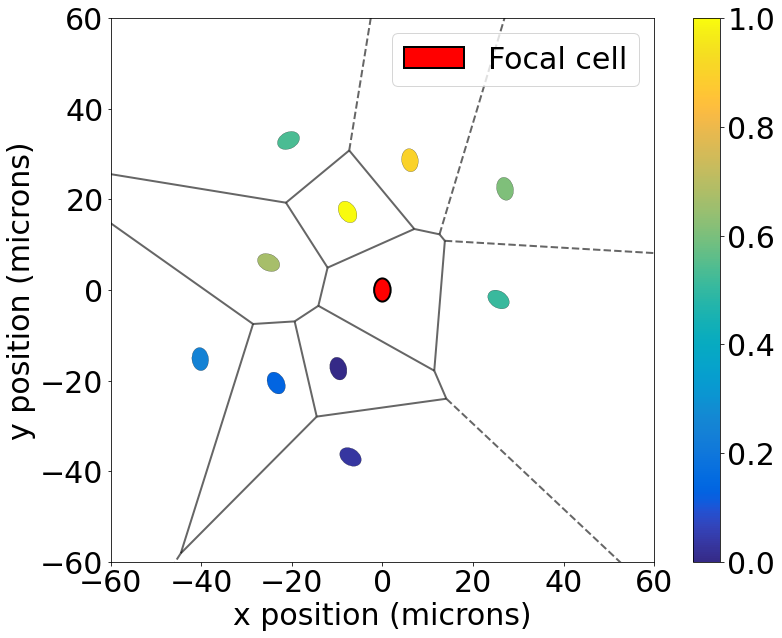

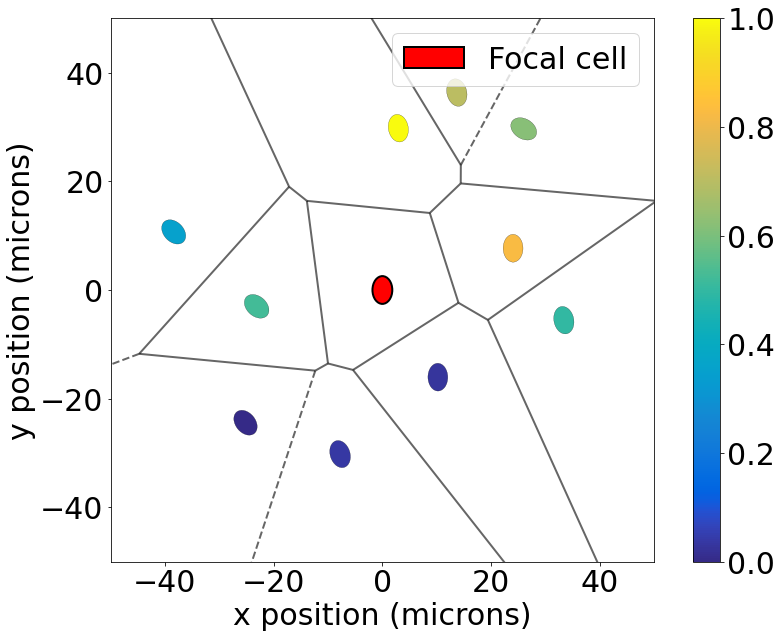

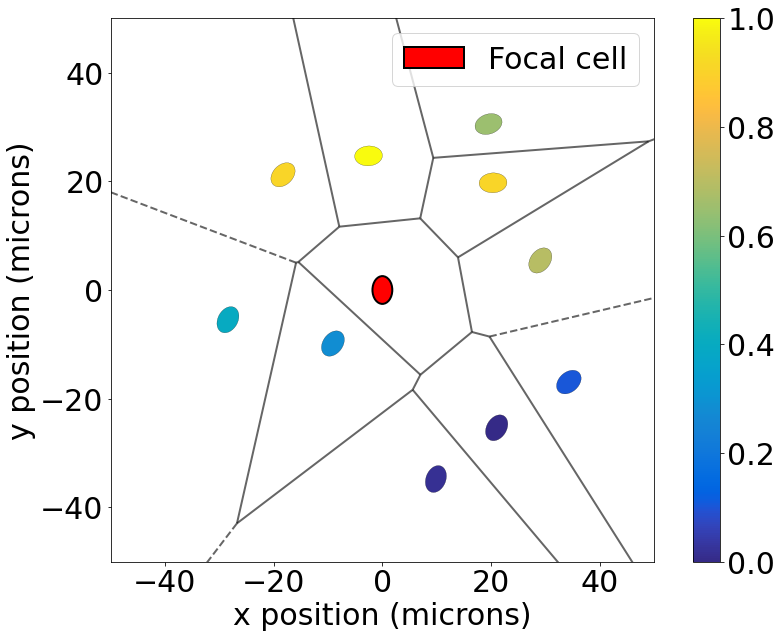

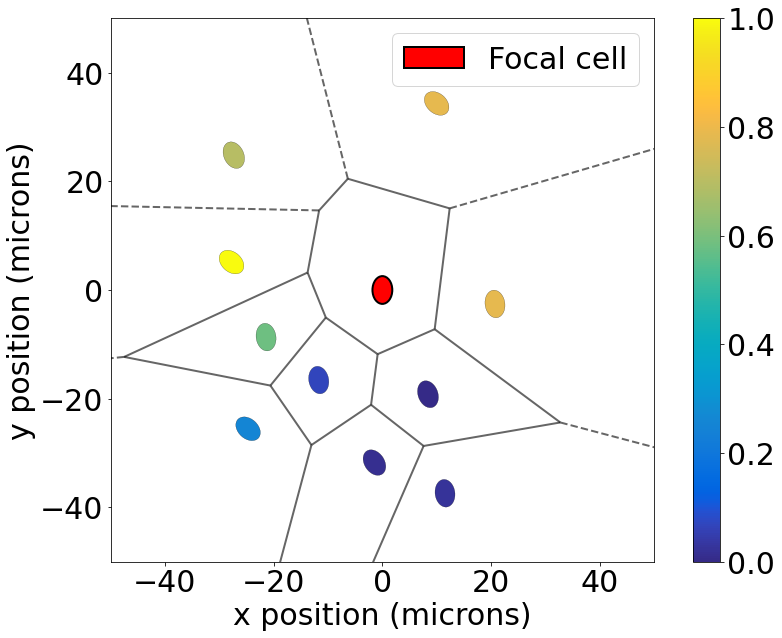

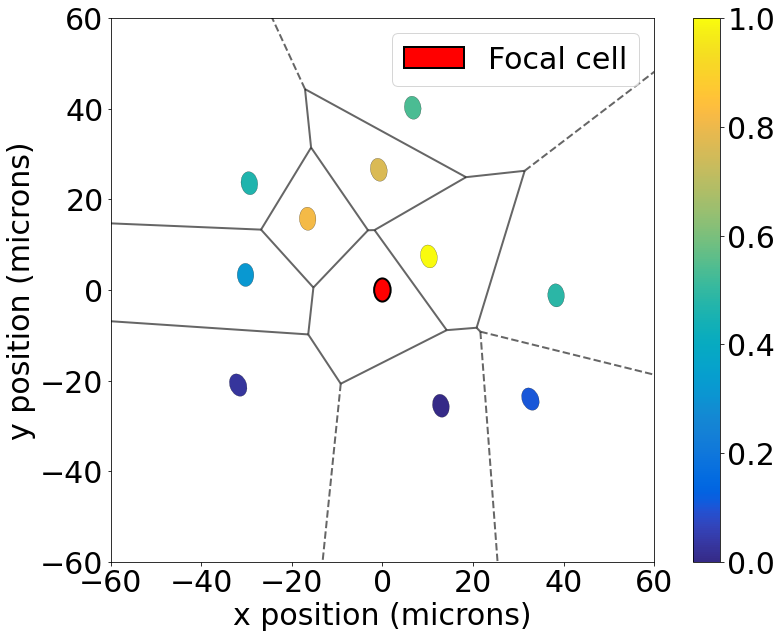

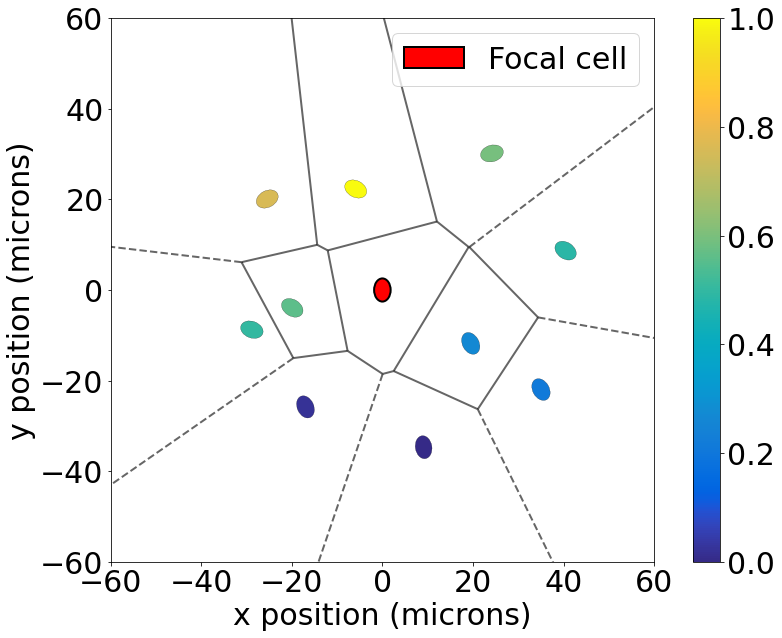

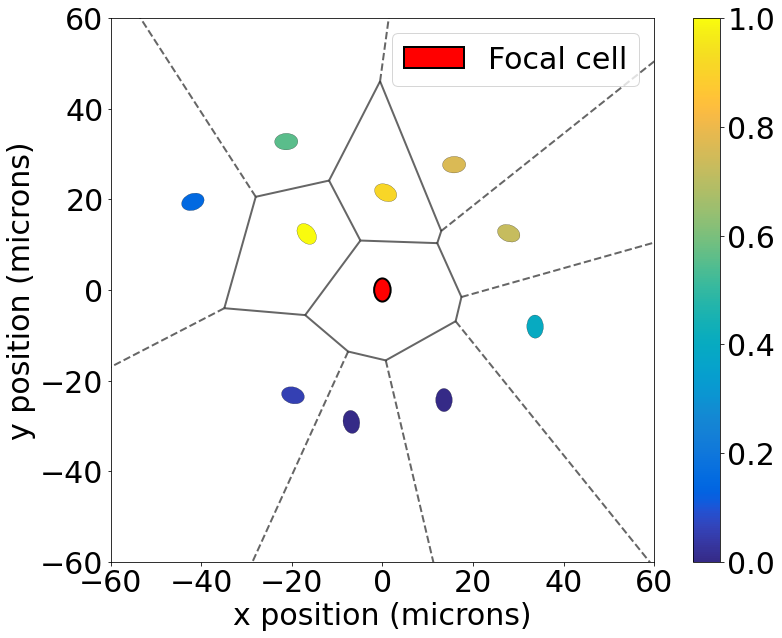

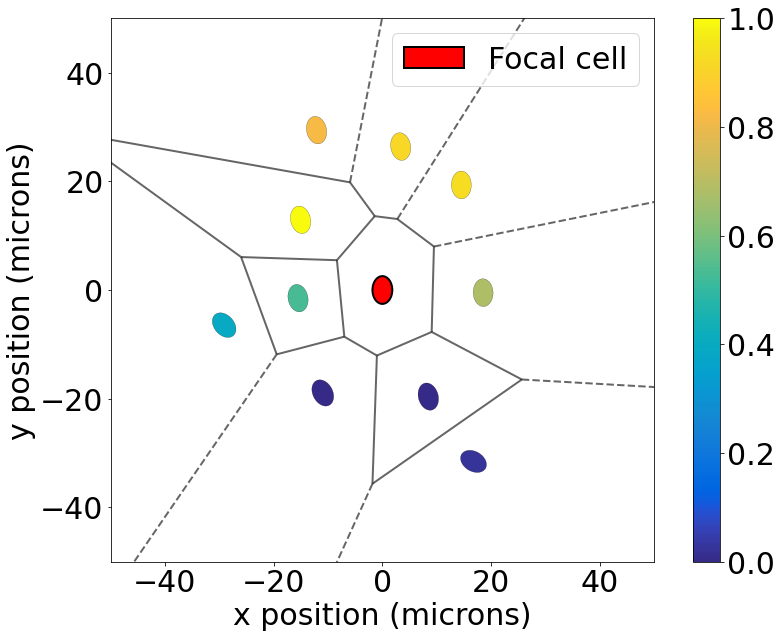

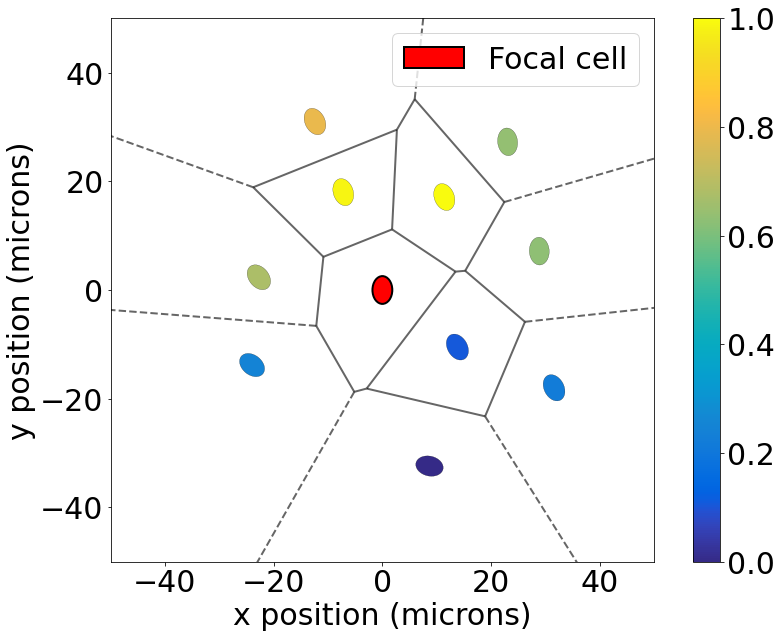

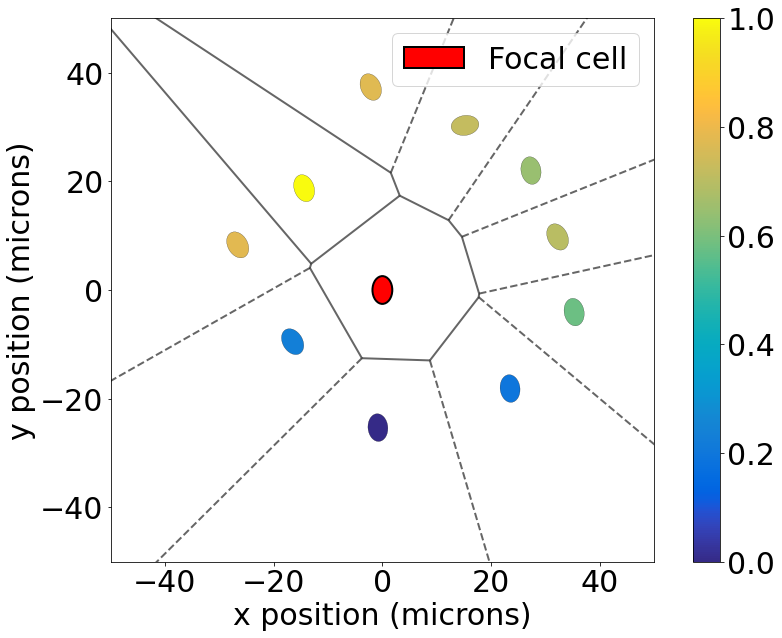

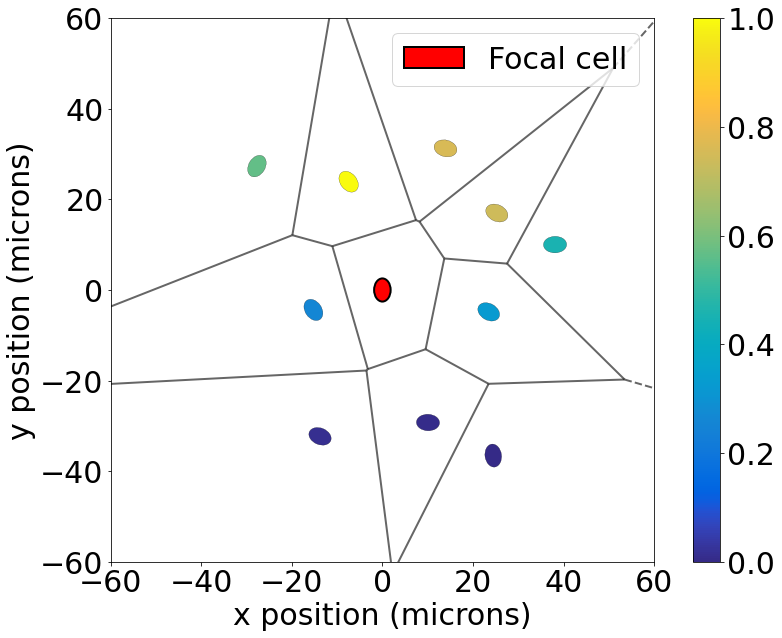

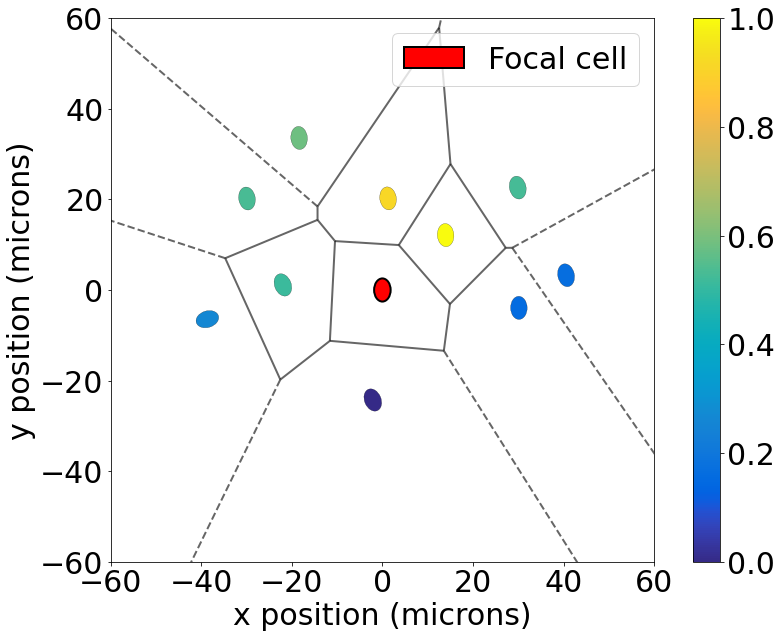

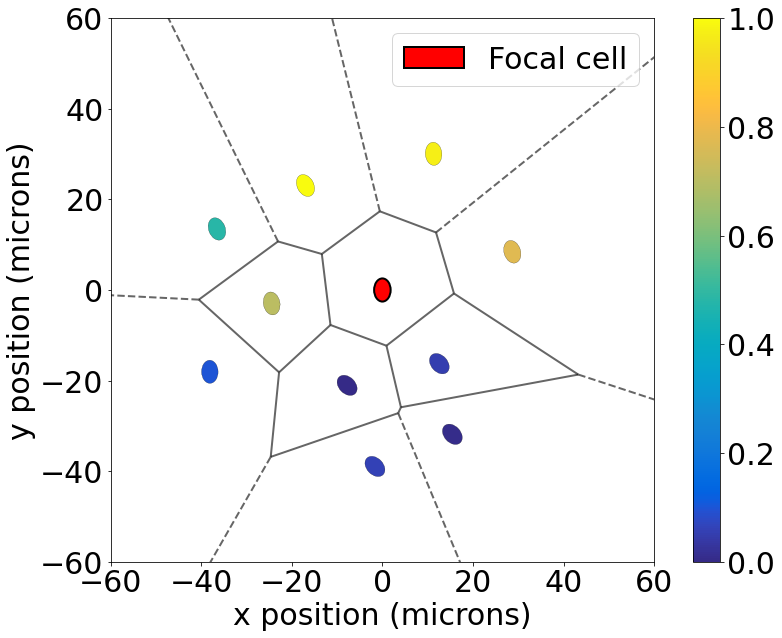

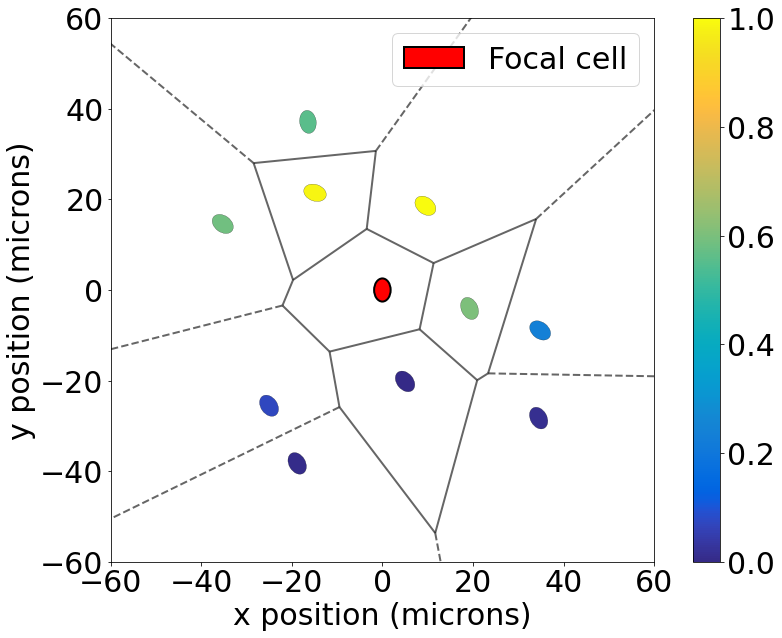

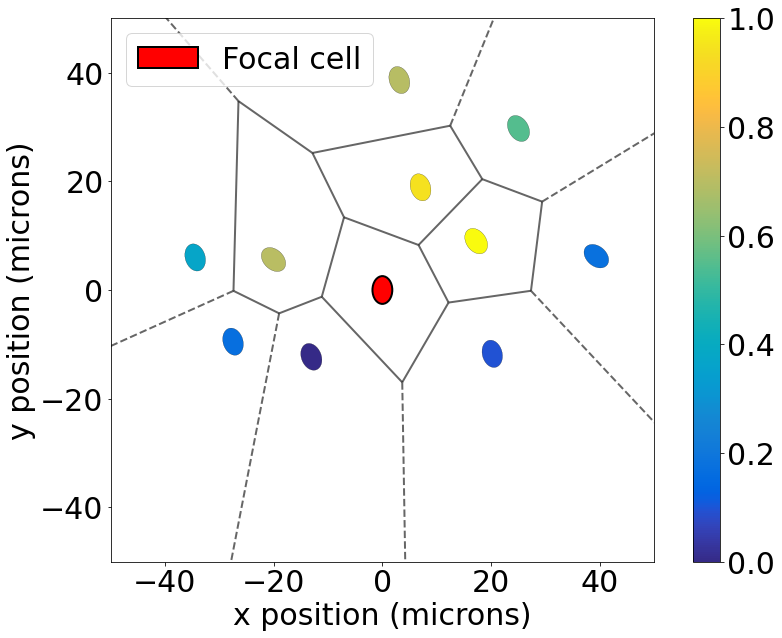

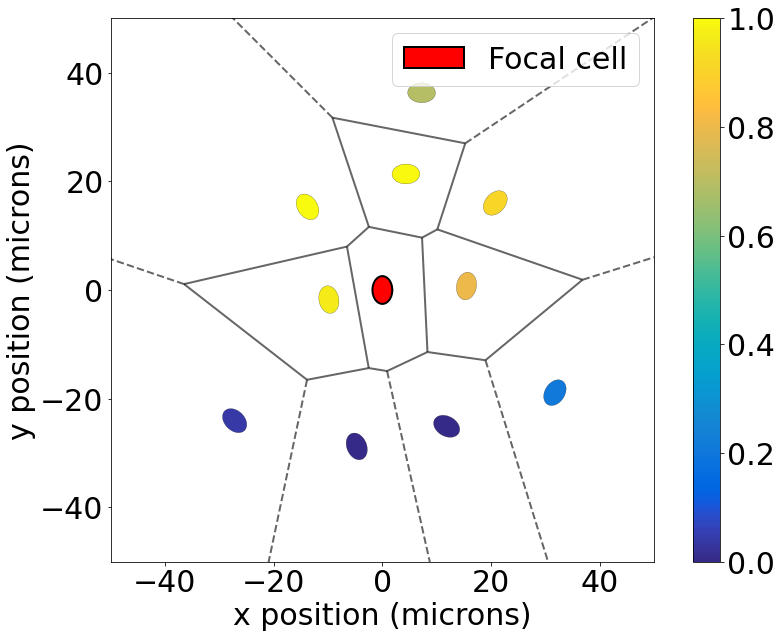

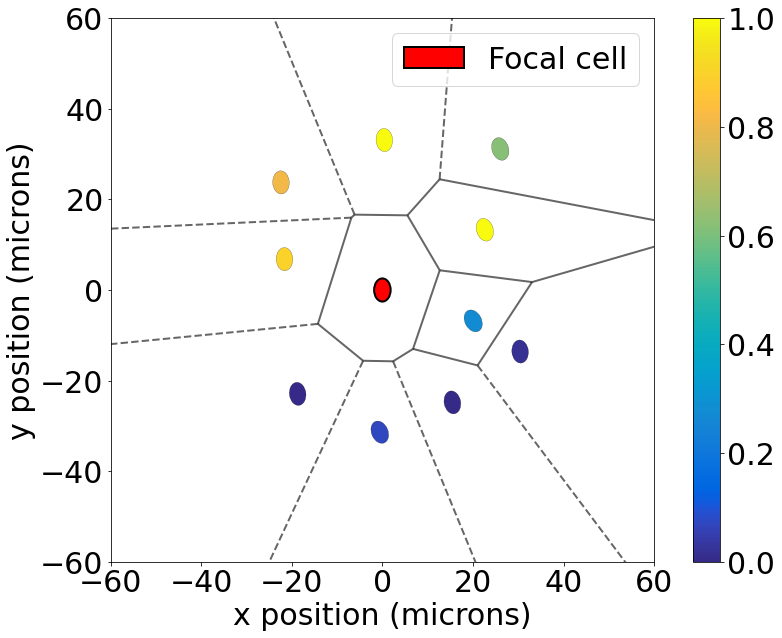

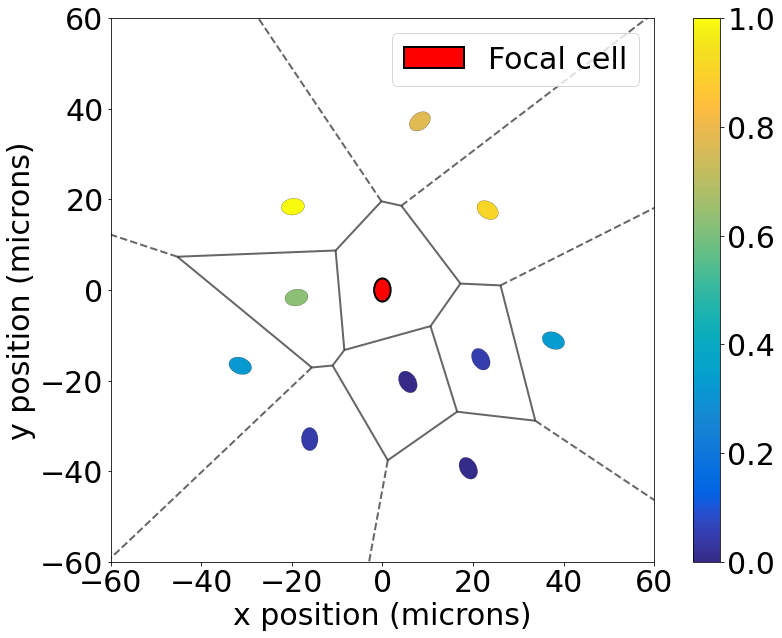

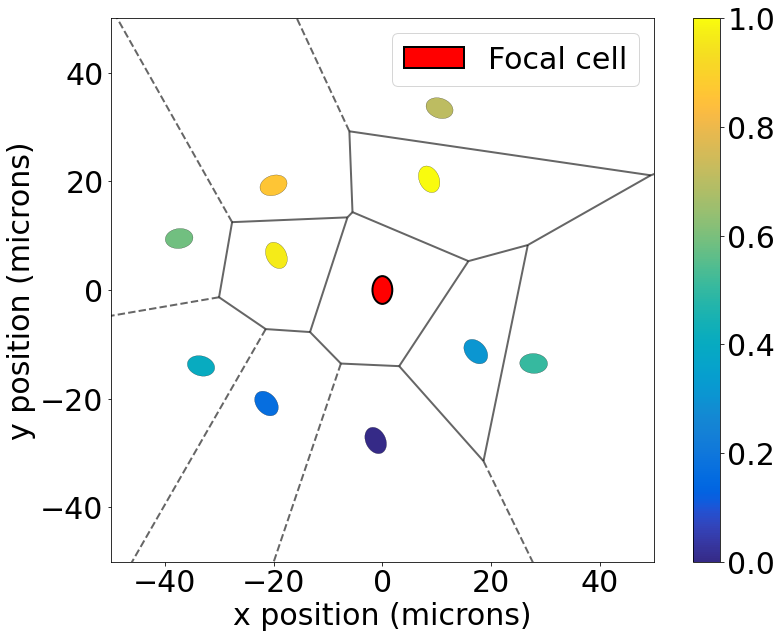

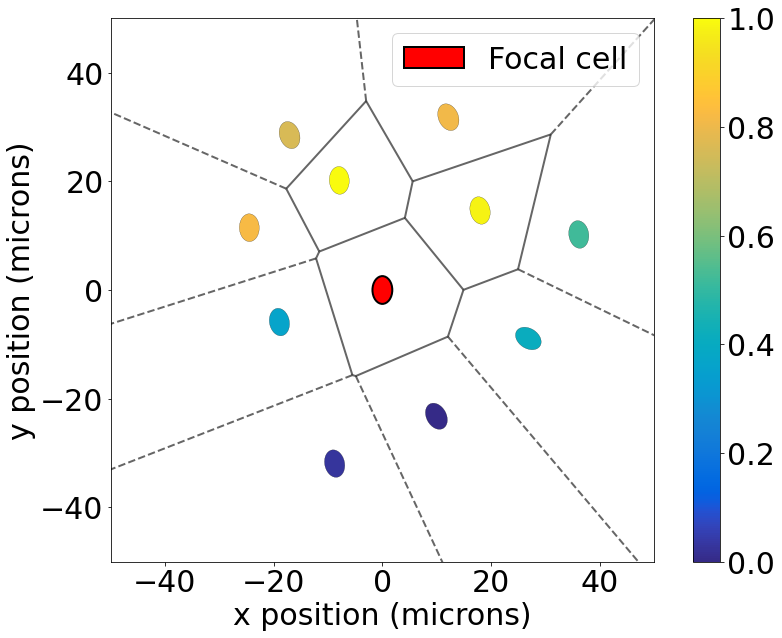

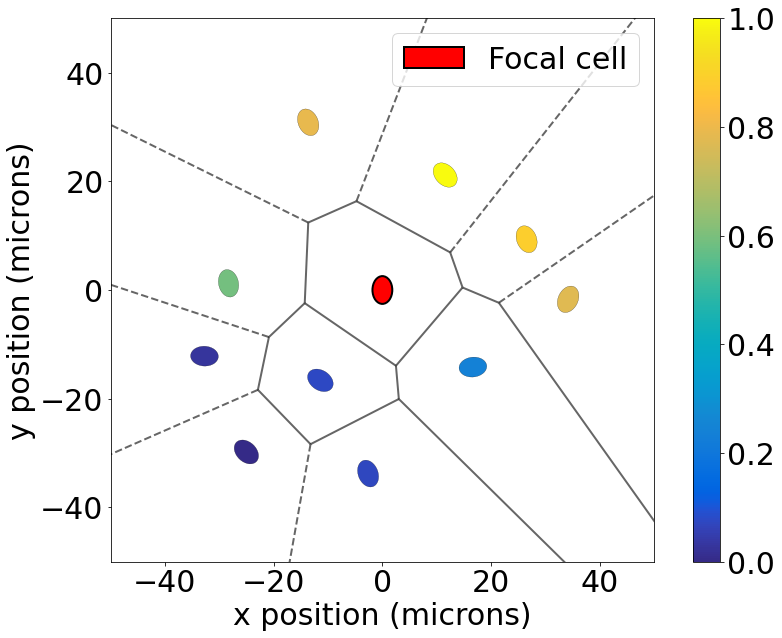

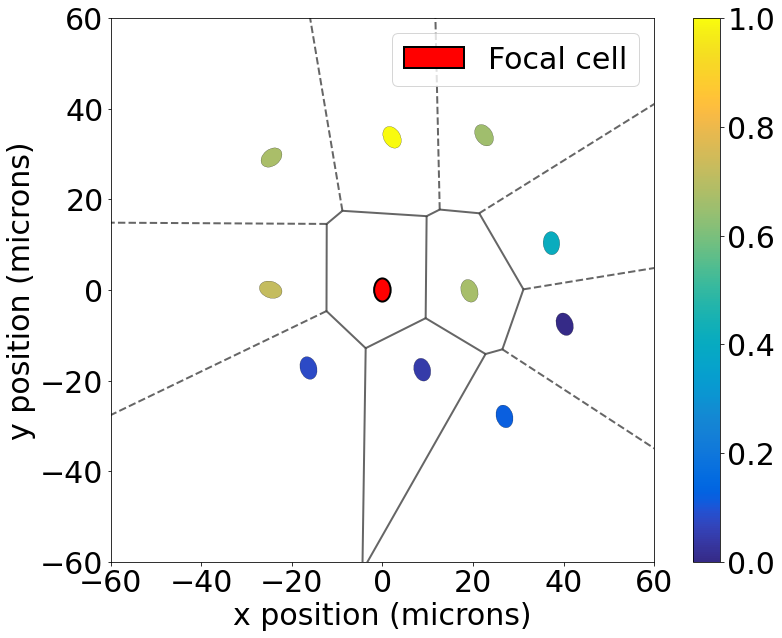

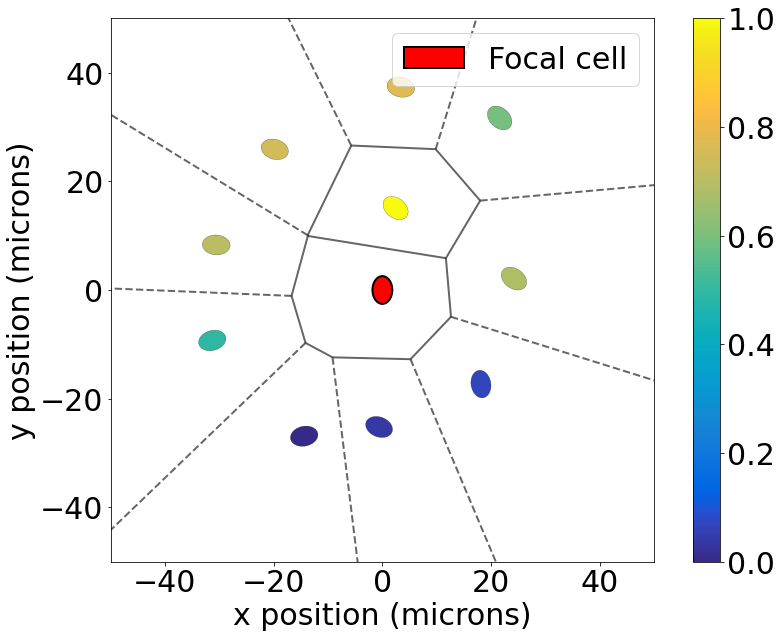

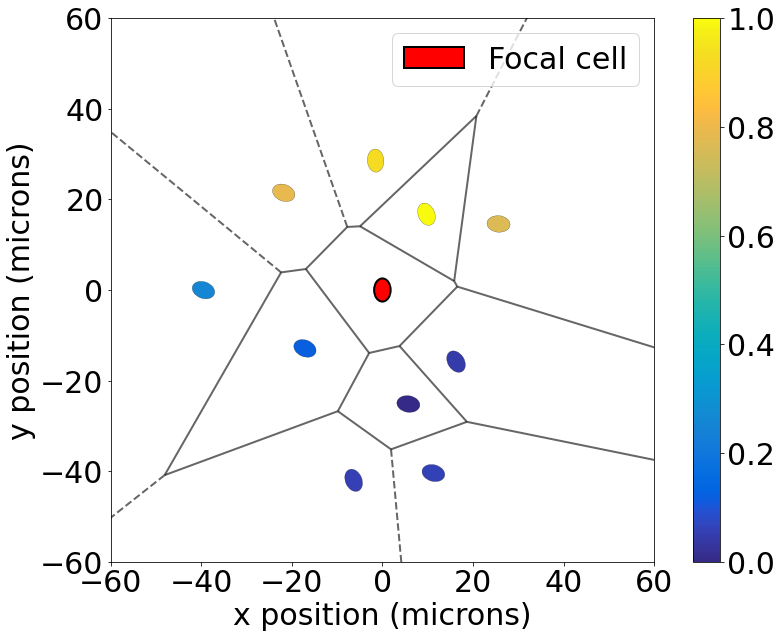

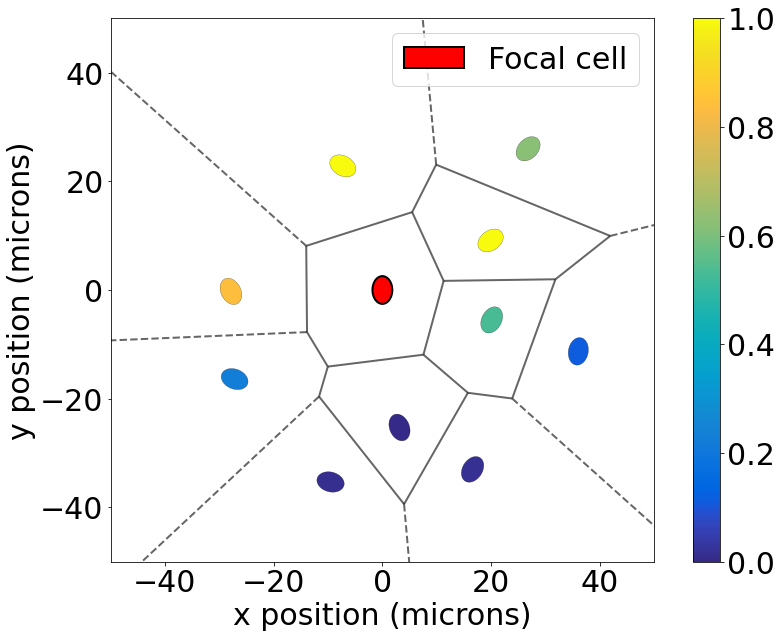

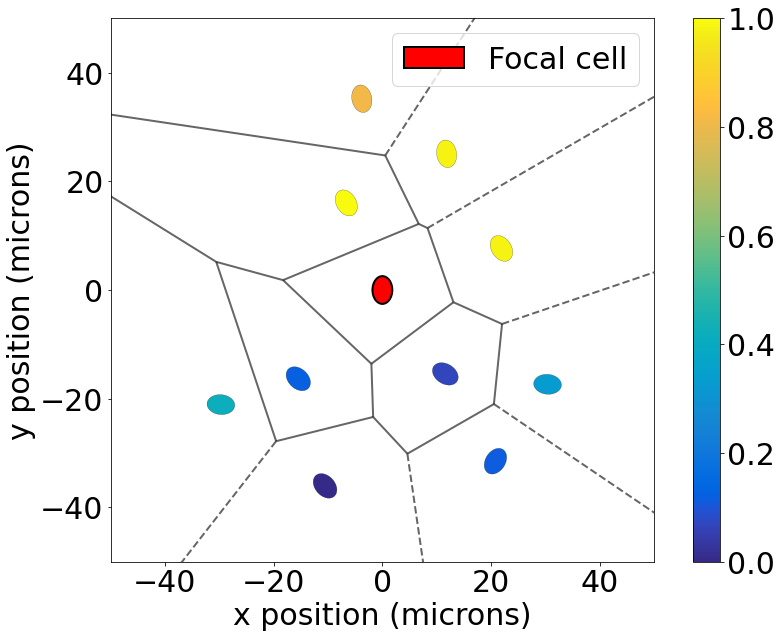

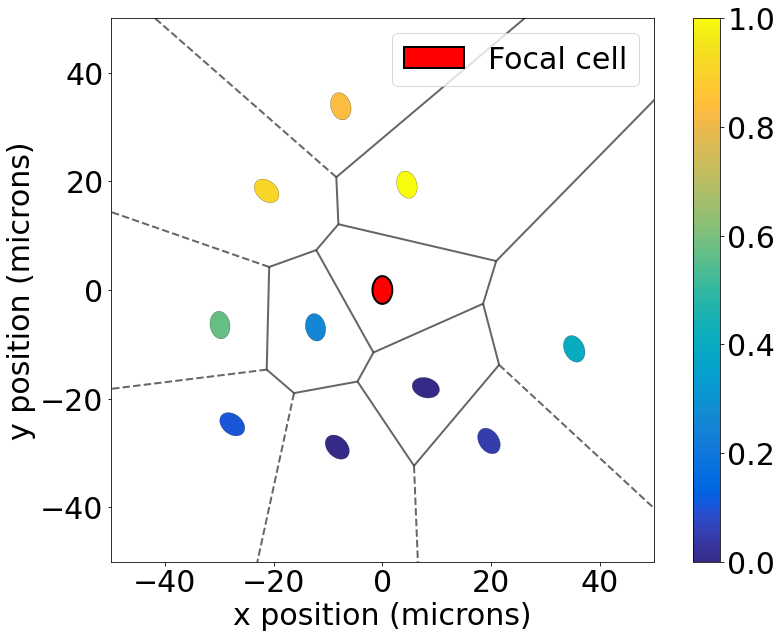

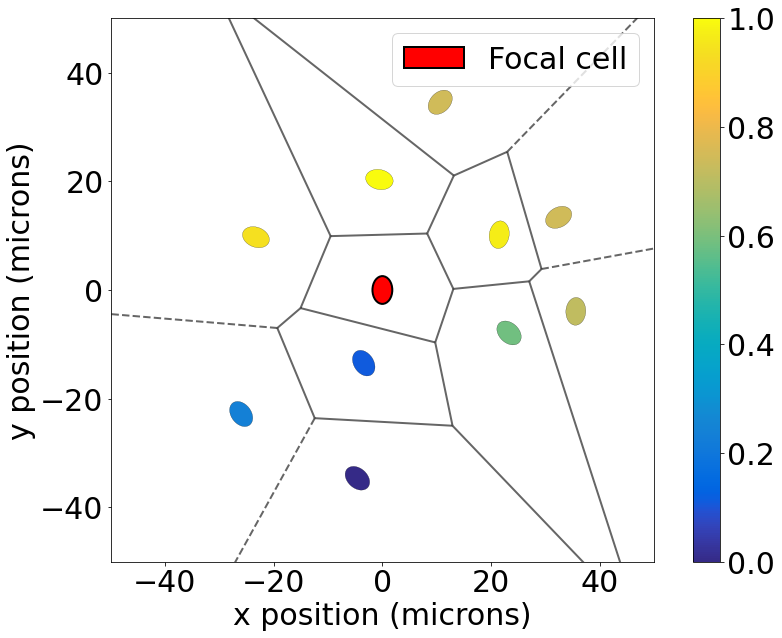

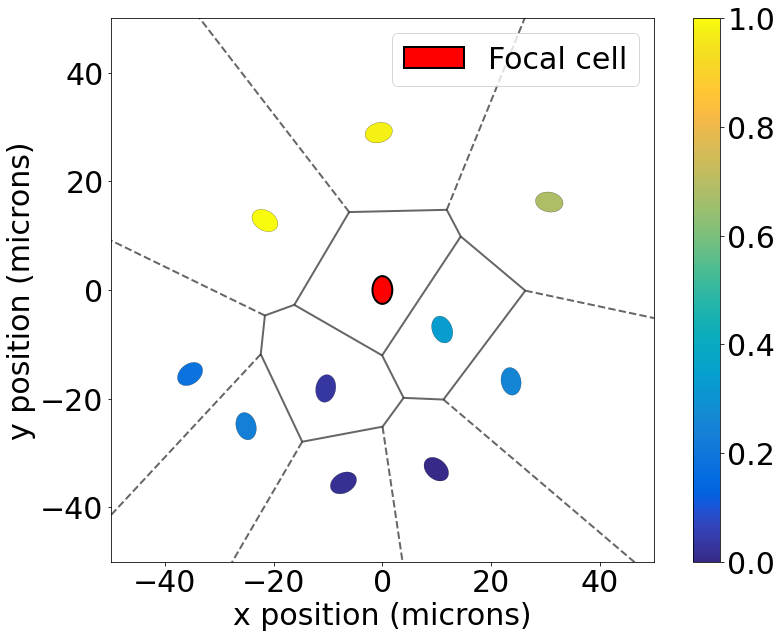

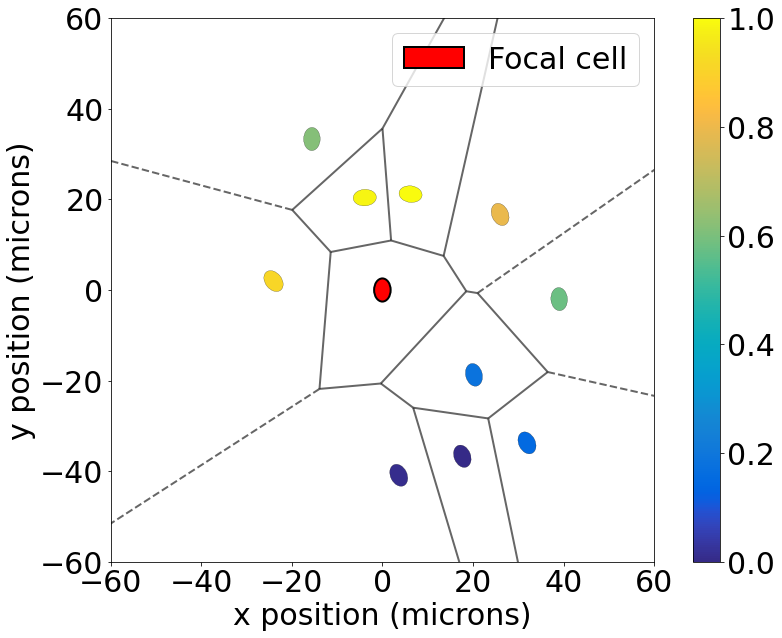

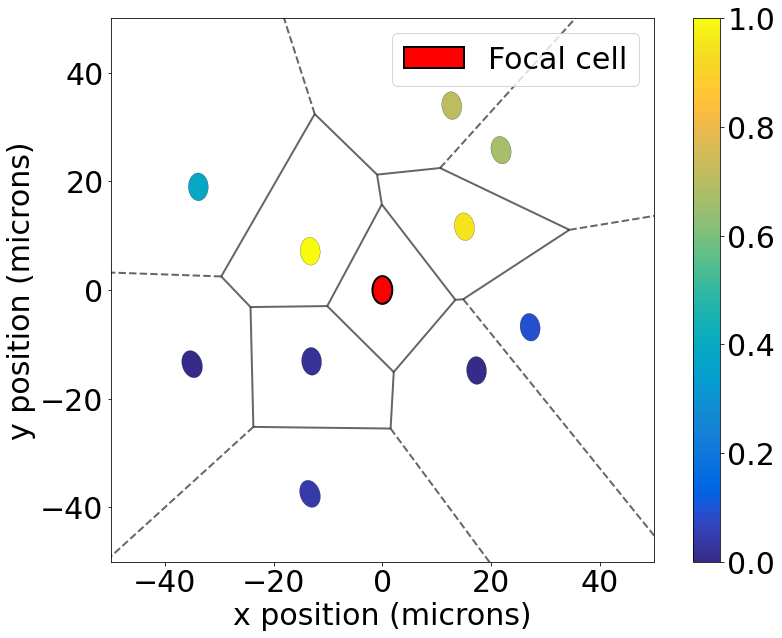

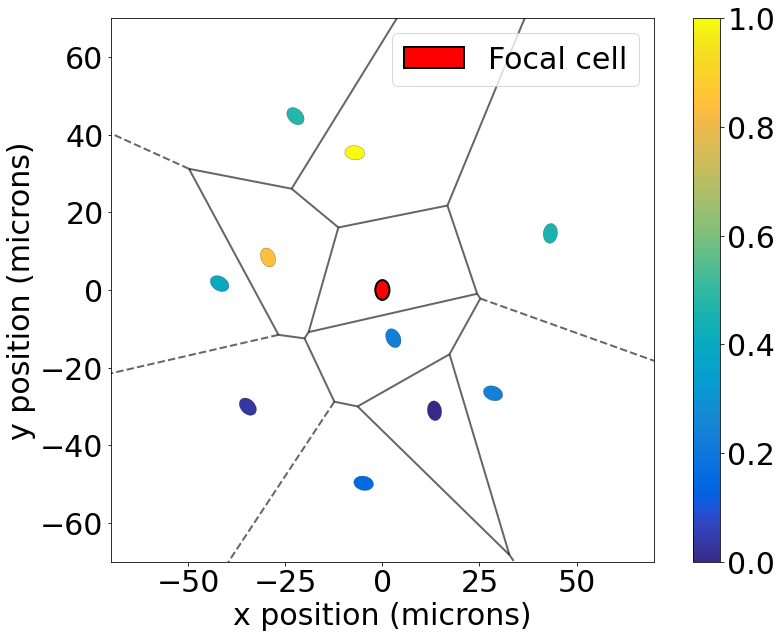

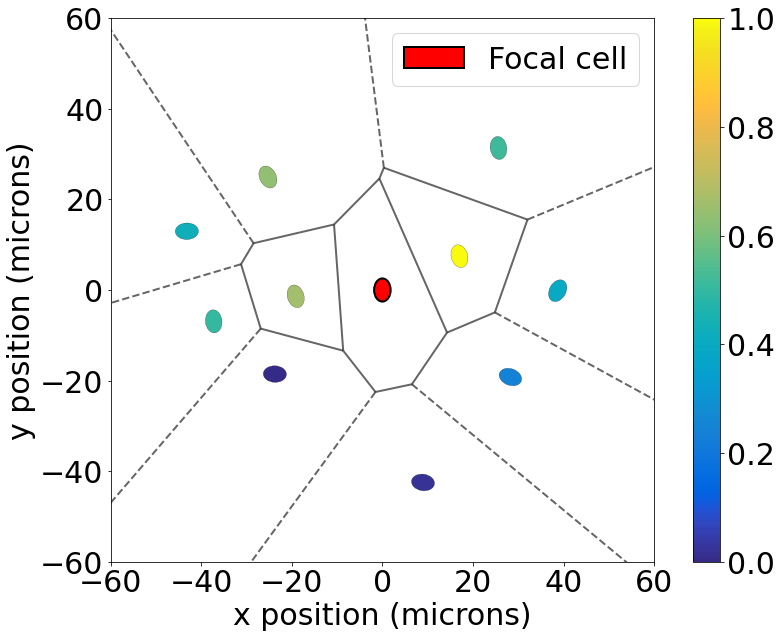

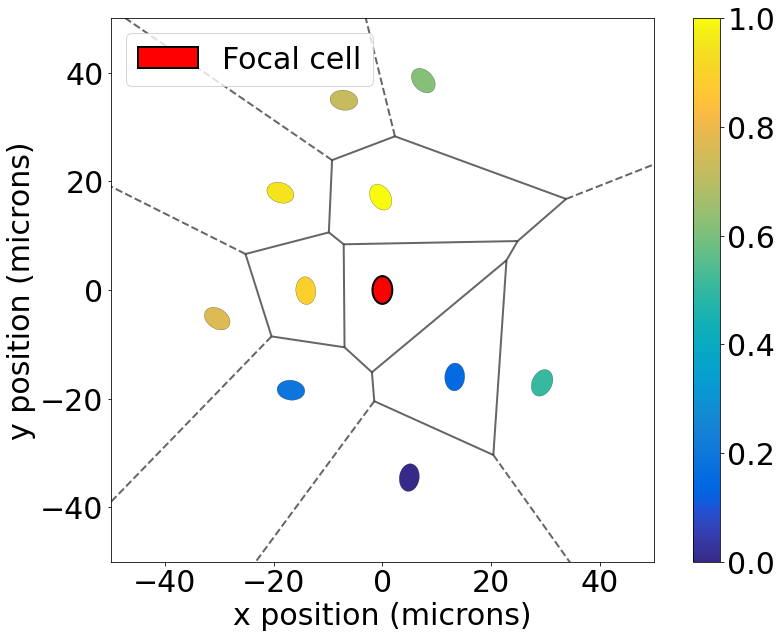

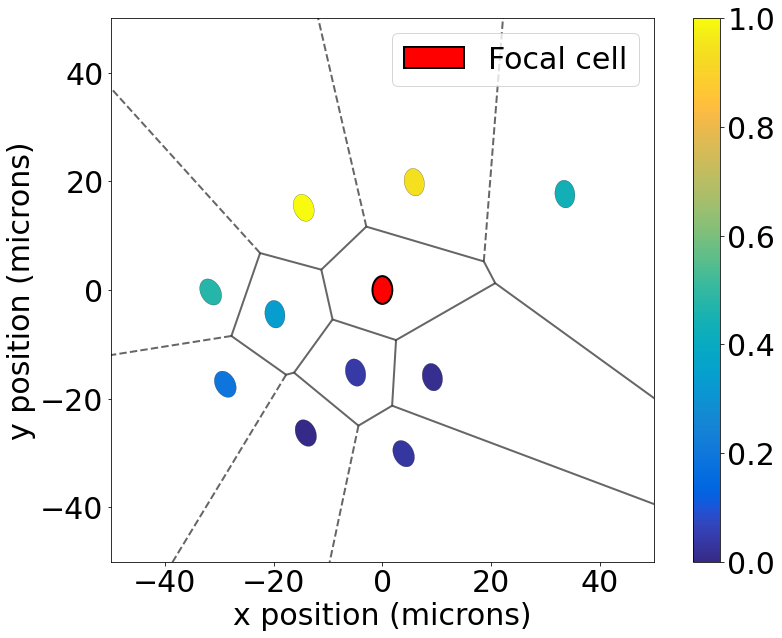

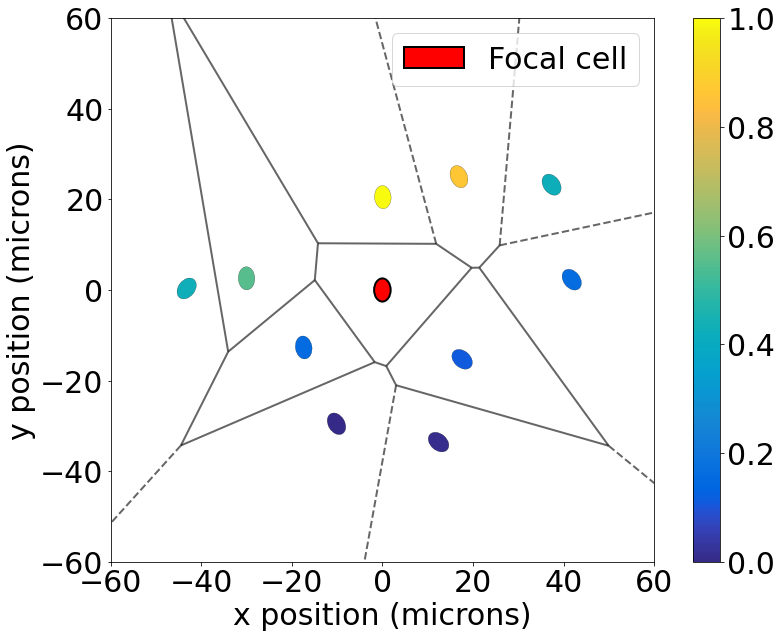

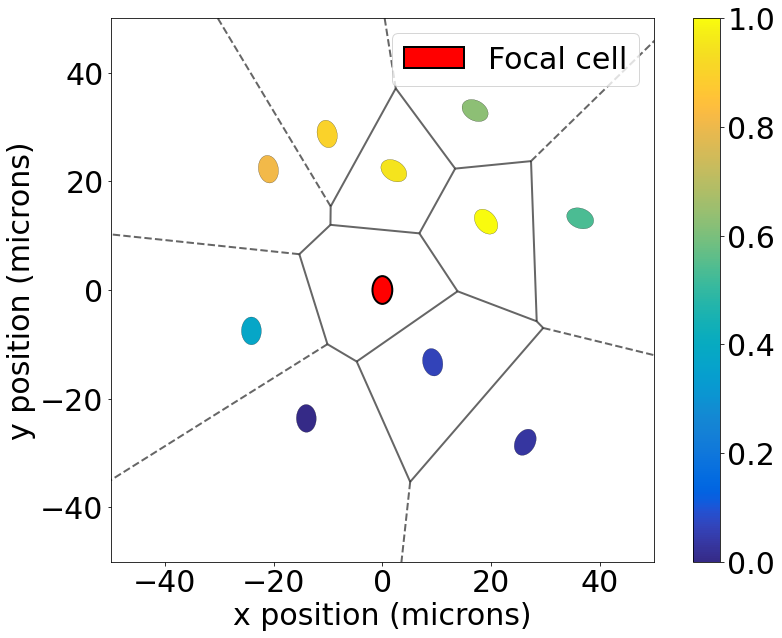

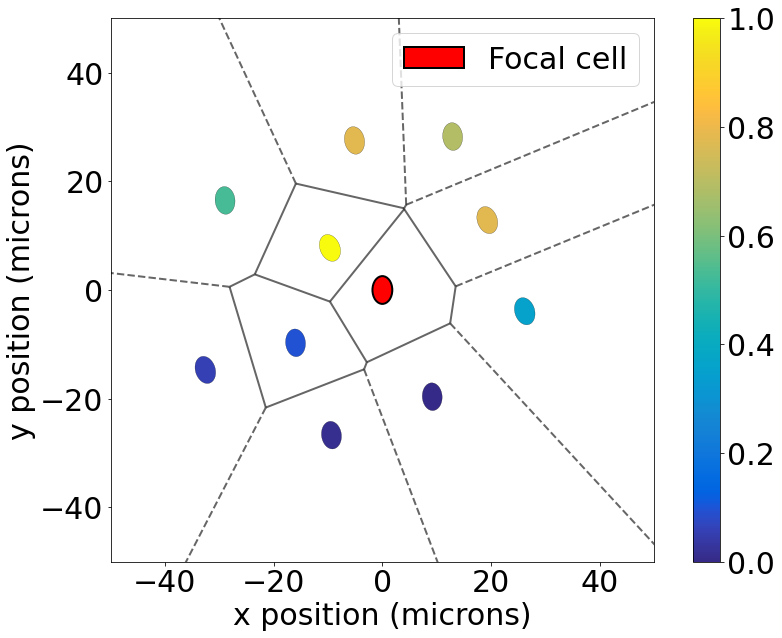

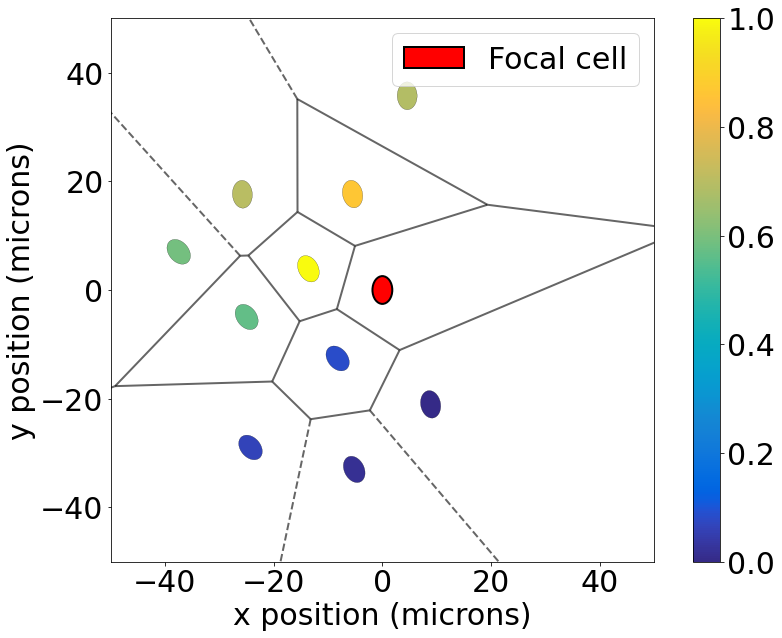

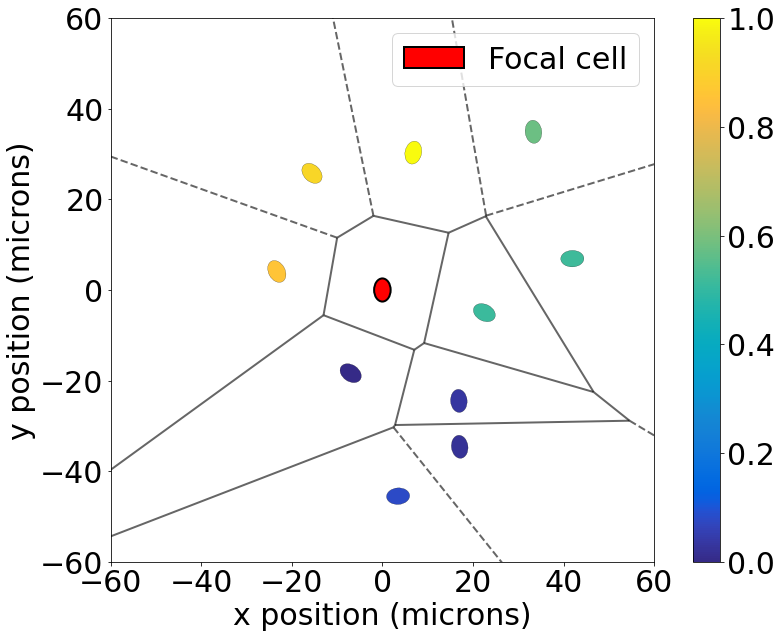

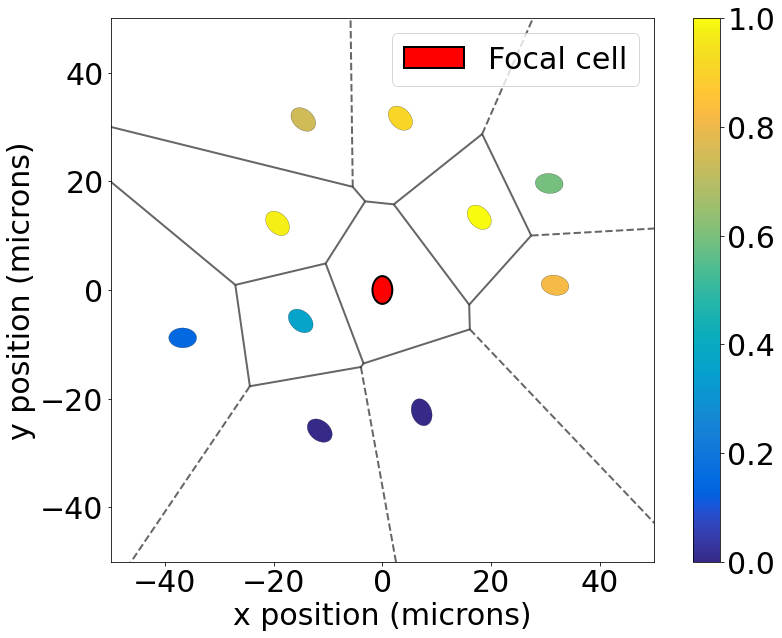

In [10]:
import numpy as np
import os
#import pickle
import pickle5 as pickle
import matplotlib.pyplot as plt
from trajectorytools.geometry import angle_between_vectors
from matplotlib.patches import Ellipse
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import PatchCollection
from scipy.spatial import Voronoi, voronoi_plot_2d
import math

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

main_folder = './cluster_out_3/MDCK_Bulk_NumNeighbors_10_FutureSteps_2_NumEpochs_1000_RemoveOuter_def/'
#main_folder = './cluster_out_3/HUVEC_Bulk_46_NumNeighbors_20_FutureSteps_2_NumEpochs_1000_RemoveOuter_def/'
#main_folder = './cluster_out_4/MDA_MB_231_Bulk_NumNeighbors_10_FutureSteps_4_NumEpochs_1000_RemoveOuter_def/'

input_data = main_folder + 'output_results.npy'
output_folder = main_folder + 'vor_pics_jpg/'
output_folder_pdf = main_folder + 'vor_pics_pdf/'
results_pkl = main_folder + 'results.pkl'

#output_folder = './pics/huvec_pics/test/'

min_no = 1000
max_no = 1100

if('HUVEC' in main_folder):
    pix_in_um = 1.825 # HUVEC data, 7.3/4
    fac = pix_in_um*1000
if('MDCK' in main_folder or 'MDA' in main_folder):
    pix_in_um = 0.73 # MDCK/MDA data, 7.3/10
    fac = pix_in_um*1000

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
if not os.path.exists(output_folder_pdf):
    os.makedirs(output_folder_pdf)

#d = np.load('fishes_data_restrict.npy', allow_pickle=True)
#f = np.load('fishes_social_and_focal.npy', allow_pickle=True)
g = np.load(input_data, allow_pickle=True)
gd = g.item()

with open(results_pkl, 'rb') as pickle_file:
    d_pkl = pickle.load(pickle_file)
    arena_radius = d_pkl['arena_radius'][0]

for elem_no in range(min_no, max_no+1):

    flux = gd['attention_layer'][elem_no]
    flux_all = gd['attention_layer']
    #normflux = (np.max(flux_all) - flux) / (np.max(flux_all) - np.min(flux_all))
    #normflux = flux
    normflux = (flux - np.min(flux)) / (np.max(flux) - np.min(flux))
    #fluxcolor = (1.-normflux, 1.-normflux, normflux)
    fluxcolor = (normflux, 1.-normflux, normflux)

    # Define our colormap here. 
    # Want red and green to be 1 at 0, and 0 at 1. Blue to be 0 at 0, and 1 at 1.
    cdict = {'red':  ((0.0,1.0,1.0),
                      (1.0,0.0,0.0)),
            'green': ((0.0,1.0,1.0),
                      (1.0,0.0,0.0)),
            'blue':  ((0.0,0.0,0.0),
                      (1.0,1.0,1.0))
            }
    # Use that dictionary to define the Linear SegmentedColormap
    YlBu = colors.LinearSegmentedColormap('GnBu',parula_map)

    plt.figure(figsize=(14, 10))
    plt.rcParams.update({'font.size': 30})
    ax = plt.gca(aspect='equal')
      
    w = 0.005*fac
    h = 0.007*fac
    
    #h = 0.1
    #w = h*(0.7)
    
    # (6.5 um camera pixels) / (4 x mag) * (1 / 15 bodylength/pixels)
    # conversion_factor = (6.5 / 4.0) * (15.0)
    #conversion_factor = 3328.0 / (6.5 / 4.0) 
    #conversion_factor = 1536.0
    
    # Convert sizes to microns: 
    pix_size = arena_radius
    total_size_um = pix_size * pix_in_um

    # Add surrounding cells: 
    NUM = len(gd['attention_layer'][0])
    
    store_vor = []
    for i in range(NUM+1):
        store_vor.append(gd['social'][elem_no][i][0:2]*total_size_um)
    
    vor = Voronoi(store_vor) #vor = Voronoi(gd['social'][elem_no][i+1][0:2]*conversion_factor)
    voronoi_plot_2d(vor, ax, show_vertices=False, line_colors='k', line_width=2, line_alpha=0.6, point_size=0)
    
    ells = [Ellipse(xy= gd['social'][elem_no][i+1][0:2]*total_size_um, width=w, height=h, 
                    angle=np.degrees(angle_between_vectors(np.array([0,1]), gd['social'][elem_no][i+1][2:4]).flatten()))
            for i in range(NUM)]

    pc = PatchCollection(ells,False,lw=3,cmap=parula_map,edgecolor='k', linewidth=0.2)#,edgecolor='k',facecolor='None')
    pc.set_array(np.array(fluxcolor[0]))
    #pc.set_clim([0.0, .05])
    ax.add_collection(pc)
    plt.colorbar(pc,orientation='vertical')

    # Add central cell:
    ellipse = Ellipse(xy=(0.00, 0.00), width=w, height=h, edgecolor='k', fc='r', lw=2, label='Focal cell')
    ax.add_patch(ellipse)

    # Set plot limits:
    #plt.xlim(-.1, .1)
    #plt.ylim(-.1, .1)
    
    
    distance = []
    for i in range(NUM):
        distance.append(math.sqrt( ((gd['social'][elem_no][i+1][0]*total_size_um)**2)+((gd['social'][elem_no][i+1][1]*total_size_um)**2) ))
    
    #print(np.max(distance))
    
    #limval = 120
    limval = (math.ceil(np.max(distance) / 10.0) +1) * 10
    plt.xlim(-1.0*limval, limval)
    plt.ylim(-1.0*limval, limval)
    ax.legend()
    plt.xlabel('x position (microns)')
    plt.ylabel('y position (microns)')
    


    img_name = output_folder + 'img_' + str(elem_no) + '.jpg'
    plt.savefig(img_name)
    
    img_name_pdf = output_folder_pdf + 'img_' + str(elem_no) + '.pdf'
    plt.savefig(img_name_pdf)
    
    plt.show()


In [11]:
print(output_folder_pdf)

./cluster_out_3/MDCK_Bulk_NumNeighbors_10_FutureSteps_2_NumEpochs_1000_RemoveOuter_def/vor_pics_pdf/
